In [1]:
%matplotlib inline
from getdist import plots, MCSamples
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.interpolate import griddata
from scipy import stats
import getdist
import healpy as hp
import matplotlib
import numpy as np
import os
import sys
sys.path.append('../Cls/')
import common as co

import sacc

DCOLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

####### Default rcParams
rcParamsDefault = matplotlib.rcParams.copy()

####### Andrina's beauty code #######
rcParamsAndrina = {}
rcParamsAndrina['lines.linewidth'] = 1.
rcParamsAndrina['lines.linestyle'] = '-'  
rcParamsAndrina['lines.color'] = 'black'

#fonts & text
rcParamsAndrina['font.family'] = 'serif'
rcParamsAndrina['font.weight'] = 'normal'
rcParamsAndrina['font.size'] = 12.0
rcParamsAndrina['text.color'] = 'black'
rcParamsAndrina['text.usetex'] = True

#axes & ticks
rcParamsAndrina['axes.edgecolor'] = 'black'
rcParamsAndrina['axes.linewidth'] = 1.6
rcParamsAndrina['axes.grid'] = False
rcParamsAndrina['axes.titlesize'] = 'x-large'
rcParamsAndrina['axes.labelsize'] = 32
rcParamsAndrina['axes.labelweight'] = 'normal'
rcParamsAndrina['axes.labelcolor'] = 'black'
rcParamsAndrina['axes.formatter.limits'] = [-4, 4]

rcParamsAndrina['xtick.major.size'] = 7
rcParamsAndrina['xtick.minor.size'] = 4
rcParamsAndrina['xtick.major.pad'] = 6
rcParamsAndrina['xtick.minor.pad'] = 6
rcParamsAndrina['xtick.labelsize'] = 32
rcParamsAndrina['xtick.minor.width'] = 1.6
rcParamsAndrina['xtick.major.width'] = 1.6

rcParamsAndrina['ytick.major.size'] = 7
rcParamsAndrina['ytick.minor.size'] = 4
rcParamsAndrina['ytick.major.pad'] = 6
rcParamsAndrina['ytick.minor.pad'] = 6
rcParamsAndrina['ytick.labelsize'] = 32
rcParamsAndrina['ytick.minor.width'] = 1.6
rcParamsAndrina['ytick.major.width'] = 1.6

#legends
rcParamsAndrina['legend.numpoints'] = 1
rcParamsAndrina['legend.fontsize'] = 32
rcParamsAndrina['legend.shadow'] = False
rcParamsAndrina['legend.frameon'] = False

rcParamsAndrina['figure.autolayout'] = True

# colors
colors = ['#e3a19c', '#85a1ca', '#596d82', '#725e9c', '#3d306b', '#AE7182']

# Path to save figs
path2figs = './figures_shear/'

In [2]:
# Update with data in xC-ell/ShearCl repo (most up to date)
path2data = '/mnt/extraspace/gravityls_3/S8z/Cls/all_together_metacal_new_niter0_true/'
path2fid = '/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/'
path2cov = path2data + 'cov_new_fiducial/'

# wltype = 'metacal'
nside=4096

############# Use SACC if possible
scls = sacc.Sacc.load_fits(path2data + 'DESwl.fits')
snls = sacc.Sacc.load_fits(path2data + 'DESwl_nls.fits')

fload = np.load(os.path.join(path2data, 'cl_all_with_noise.npz'))
lbpw, obs_cls_all_wn = fload['l'], fload['cls']
obs_cls_all_wn = obs_cls_all_wn[5:-1, 5:-1, :]
obs_cls_all = np.load(os.path.join(path2data, 'cl_all_no_noise.npz'))['cls']
obs_cls_all = obs_cls_all[5:-1, 5:-1, :]

############# Load theory cl matrix

bins = [0, 1, 2, 3, 4] + [5, 5] + [6, 6] + [7, 7] + [8, 8] + [9]
index_B = [6, 8, 10, 12]
th_ell, th_cls_all = co.load_cls_all_array_from_files(path2fid, bins, index_B)
th_cls_all = th_cls_all[5:-1, 5:-1, :]

############### Load DES sh. noise
dessh_nls_arr = np.load(os.path.join(path2data, 'des_sh_metacal_noise_ns4096.npz'))['cls']
dessh_nls_arr_rot = np.load(os.path.join(path2data, 'des_sh_metacal_rot0-99_noise_ns4096.npz'))['cls']

#######
labels = ['\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}']
######
shlist = ['wl0', 'wl1', 'wl2', 'wl3']

/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESgc0.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESgc1.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESgc2.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESgc3.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESgc4.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESwl0.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESwl1.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESwl2.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_DESwl3.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc0_PLAcv.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc1_DESgc1.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc1_DESgc2.npz
/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/cls_DESgc1_DESgc3.npz


# Check noise

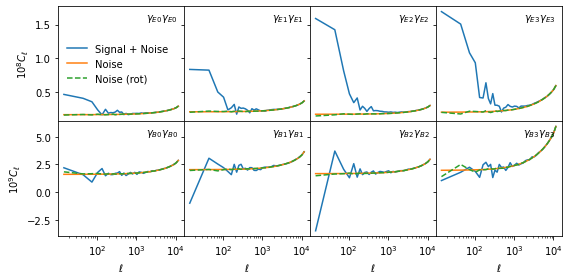

In [3]:
# Check if shear-shear is dominated by noise. That would affect the chi2 if noise is not exactly the same.
plt.rcParams = rcParamsDefault.copy()

f, axs = plt.subplots(2, 4, figsize=(8, 4), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
# wl-wl
for i, itype in enumerate(shlist):
    ixplot = i
    # EE
    axs[0, ixplot].semilogx(lbpw, 1e8*obs_cls_all_wn[i*2, i*2], label='Signal + Noise')
    axs[0, ixplot].semilogx(lbpw, 1e8*dessh_nls_arr[i, 0, 0], label='Noise')
    axs[0, ixplot].semilogx(lbpw, 1e8*dessh_nls_arr_rot[i, 0, 0], ls='--', label='Noise (rot)')
    axs[0, ixplot].text(0.95, 0.95, '$\gamma_{{E{0}}}\gamma_{{E{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[0,ixplot].transAxes)

    # BB
    axs[1, ixplot].semilogx(lbpw, 1e9*obs_cls_all_wn[1+i*2, 1+i*2], label='Signal + Noise')
    axs[1, ixplot].semilogx(lbpw, 1e9*dessh_nls_arr[i, 1, 1], label='Noise')
    axs[1, ixplot].semilogx(lbpw, 1e9*dessh_nls_arr_rot[i, 1, 1], ls='--', label='Noise (rot)')

    axs[1, ixplot].text(0.95, 0.95, '$\gamma_{{B{0}}}\gamma_{{B{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[1,ixplot].transAxes)
    axs[1, ixplot].set_xlabel(r'$\ell$')


# axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel(r'$10^8 C_\ell$')
axs[1, 0].set_ylabel(r'$10^9 C_\ell$')
axs[0, 0].legend(loc='center left', frameon=False)
plt.tight_layout()
plt.savefig(path2figs + 'noise.pdf')
plt.show()
plt.close()

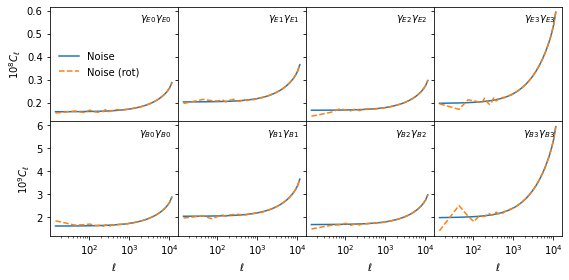

In [3]:
# Check if shear-shear is dominated by noise. That would affect the chi2 if noise is not exactly the same.
plt.rcParams = rcParamsDefault.copy()

f, axs = plt.subplots(2, 4, figsize=(8, 4), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
# wl-wl
for i, itype in enumerate(shlist):
    ixplot = i
    # EE
#     axs[0, ixplot].semilogx(lbpw, 1e8*obs_cls_all_wn[i*2, i*2], label='Signal + Noise')
    axs[0, ixplot].semilogx(lbpw, 1e8*dessh_nls_arr[i, 0, 0], label='Noise')
    axs[0, ixplot].semilogx(lbpw, 1e8*dessh_nls_arr_rot[i, 0, 0], ls='--', label='Noise (rot)')
    axs[0, ixplot].text(0.95, 0.95, '$\gamma_{{E{0}}}\gamma_{{E{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[0,ixplot].transAxes)

    # BB
#     axs[1, ixplot].semilogx(lbpw, 1e9*obs_cls_all_wn[1+i*2, 1+i*2], label='Signal + Noise')
    axs[1, ixplot].semilogx(lbpw, 1e9*dessh_nls_arr[i, 1, 1], label='Noise')
    axs[1, ixplot].semilogx(lbpw, 1e9*dessh_nls_arr_rot[i, 1, 1], ls='--', label='Noise (rot)')

    axs[1, ixplot].text(0.95, 0.95, '$\gamma_{{B{0}}}\gamma_{{B{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[1,ixplot].transAxes)
    axs[1, ixplot].set_xlabel(r'$\ell$')


# axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel(r'$10^8 C_\ell$')
axs[1, 0].set_ylabel(r'$10^9 C_\ell$')
axs[0, 0].legend(loc='center left', frameon=False)
plt.tight_layout()
plt.savefig(path2figs + 'noiseOnly.pdf')
plt.show()
plt.close()

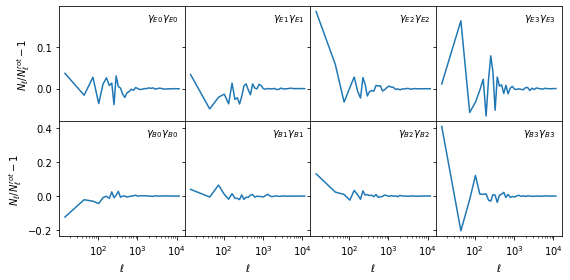

In [14]:
# Check if shear-shear is dominated by noise. That would affect the chi2 if noise is not exactly the same.
plt.rcParams = rcParamsDefault.copy()

f, axs = plt.subplots(2, 4, figsize=(8, 4), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
# wl-wl
for i, itype in enumerate(shlist):
    ixplot = i
    # EE
    axs[0, ixplot].semilogx(lbpw, dessh_nls_arr[i, 0, 0]/dessh_nls_arr_rot[i, 0, 0] - 1)
    axs[0, ixplot].text(0.95, 0.95, '$\gamma_{{E{0}}}\gamma_{{E{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[0,ixplot].transAxes)

    # BB
    axs[1, ixplot].semilogx(lbpw, dessh_nls_arr[i, 1, 1]/dessh_nls_arr_rot[i, 1, 1] -1)

    axs[1, ixplot].text(0.95, 0.95, '$\gamma_{{B{0}}}\gamma_{{B{0}}}$'.format(i),
                        horizontalalignment='right', verticalalignment='top',
                        transform=axs[1,ixplot].transAxes)
    axs[1, ixplot].set_xlabel(r'$\ell$')


# axs[0, 0].set_yscale('log')
# axs[1, 0].set_yscale('log')

axs[0, 0].set_ylabel(r'$N_\ell / N^{rot}_\ell -1$')
axs[1, 0].set_ylabel(r'$N_\ell / N^{rot}_\ell -1$')
plt.tight_layout()
# plt.savefig(path2figs + 'noiseOnly.pdf')
plt.show()
plt.close()

# Null tests

## PSFi-ei

### $C_\ell$

In [13]:
cls_psf_file = np.load(path2data + 'cls_psfi-ei.npz')
lbpw = cls_psf_file['l']
cls_psf = cls_psf_file['cls']

CovTh = np.load(path2data + 'cov_psfi-ei.npz')['cov']

labels = ['EE', 'EB', 'BE', 'BB']

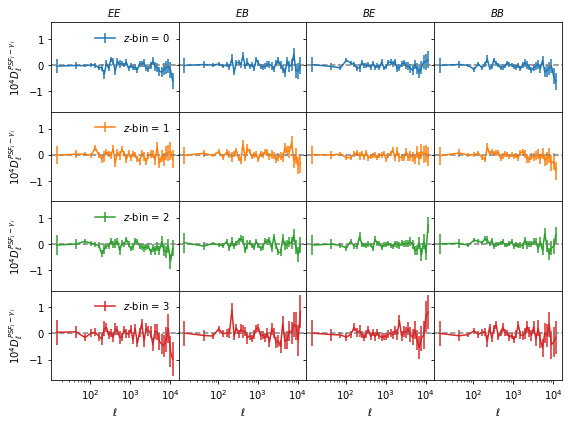

In [10]:
plt.rcParams = rcParamsDefault
######
f, ax = plt.subplots(4, 4, figsize=(8, 6), gridspec_kw={'hspace': 0, 'wspace':0},
                     sharex=True, sharey=True)
for ibin, cls in enumerate(cls_psf):
    cls = cls.reshape((4, -1))
    for j, clsj in enumerate(cls):
        yerr = np.sqrt(np.diag(CovTh[ibin][:, j, :, j]))
        ax[ibin, j].errorbar(lbpw, 1e4*lbpw*(lbpw+1)*clsj, yerr=1e4*lbpw*(lbpw+1)*yerr,
                             c=DCOLORS[ibin], label=r'$z$-bin = {}'.format(ibin))
        ax[ibin, j].axhline(0, c='gray', ls='--')

for i, label in enumerate(labels):
    ax[0, i].set_title(r'${}$'.format(label), fontsize=10)
    ax[-1, i].set_xlabel(r'$\ell$')
    ax[i, 0].set_ylabel(r'$10^4 D_\ell^{PSF_i-\gamma_i}$')
    ax[i,0].legend(loc=0, frameon=False)
    ax[-1, i].set_xscale('log')
plt.tight_layout()
plt.savefig(path2figs + 'psf-ei.pdf')
plt.show()
plt.close()

### $\chi^2$

In [6]:
imax = np.where(~(lbpw < 2000))[0][0]
for ibin in range(4):
    print('z-bin = ', ibin)
    for j, label in enumerate(labels):
        cls = cls_psf[ibin][:, :, :imax].reshape((4, -1))[j]
        CovTh = np.load(path2data + 'cov_psfi-ei.npz')['cov'][ibin][:imax, j, :imax, j]
        iCovTh = np.linalg.inv(CovTh)

        chi2 = cls.dot(iCovTh).dot(cls)
        print('Chi2({}, {}) / dof = {:.2f} '.format(label, label, chi2/imax),
              'PTE = {:.2f}%'.format(100*(1 - stats.chi2.cdf(chi2, imax))))
    print()

z-bin =  0
Chi2(EE, EE) / dof = 0.97  PTE = 50.82%
Chi2(EB, EB) / dof = 1.02  PTE = 43.23%
Chi2(BE, BE) / dof = 1.04  PTE = 40.90%
Chi2(BB, BB) / dof = 0.92  PTE = 58.22%

z-bin =  1
Chi2(EE, EE) / dof = 1.12  PTE = 30.93%
Chi2(EB, EB) / dof = 1.03  PTE = 42.31%
Chi2(BE, BE) / dof = 0.63  PTE = 92.54%
Chi2(BB, BB) / dof = 0.79  PTE = 76.50%

z-bin =  2
Chi2(EE, EE) / dof = 1.00  PTE = 46.24%
Chi2(EB, EB) / dof = 1.13  PTE = 29.71%
Chi2(BE, BE) / dof = 0.72  PTE = 83.72%
Chi2(BB, BB) / dof = 1.13  PTE = 30.13%

z-bin =  3
Chi2(EE, EE) / dof = 0.93  PTE = 56.94%
Chi2(EB, EB) / dof = 1.25  PTE = 17.93%
Chi2(BE, BE) / dof = 0.48  PTE = 98.70%
Chi2(BB, BB) / dof = 1.18  PTE = 24.25%



In [14]:
imax = np.where(~(lbpw < 2*nside))[0][0]
for ibin in range(4):
    print('z-bin = ', ibin)
    for j, label in enumerate(labels):
        cls = cls_psf[ibin][:, :, :imax].reshape((4, -1))[j]
        CovTh = np.load(path2data + 'cov_psfi-ei.npz')['cov'][ibin][:imax, j, :imax, j]
        iCovTh = np.linalg.inv(CovTh)

        chi2 = cls.dot(iCovTh).dot(cls)
        print('Chi2({}, {}) / dof = {:.2f} '.format(label, label, chi2/imax),
              'PTE = {:.2f}%'.format(100*(1 - stats.chi2.cdf(chi2, imax))))
    print()

z-bin =  0
Chi2(EE, EE) / dof = 0.88  PTE = 67.54%
Chi2(EB, EB) / dof = 1.04  PTE = 41.02%
Chi2(BE, BE) / dof = 0.86  PTE = 70.03%
Chi2(BB, BB) / dof = 0.85  PTE = 72.57%

z-bin =  1
Chi2(EE, EE) / dof = 1.08  PTE = 33.56%
Chi2(EB, EB) / dof = 0.99  PTE = 48.10%
Chi2(BE, BE) / dof = 0.55  PTE = 98.76%
Chi2(BB, BB) / dof = 0.67  PTE = 93.80%

z-bin =  2
Chi2(EE, EE) / dof = 1.06  PTE = 36.77%
Chi2(EB, EB) / dof = 1.49  PTE = 2.96%
Chi2(BE, BE) / dof = 0.69  PTE = 92.13%
Chi2(BB, BB) / dof = 1.12  PTE = 28.44%

z-bin =  3
Chi2(EE, EE) / dof = 0.90  PTE = 64.39%
Chi2(EB, EB) / dof = 1.27  PTE = 13.00%
Chi2(BE, BE) / dof = 0.56  PTE = 98.41%
Chi2(BB, BB) / dof = 1.06  PTE = 37.90%



## B-modes (EB, BB)

### $\chi^2$ ($C_\ell$ with all $C_\ell$ in next section)

In [15]:
dtypes = scls.get_data_types()
trcomb = scls.get_tracer_combinations()

imax = np.where(~(lbpw < 2000))[0][0]

ic = {'cl_ee': 0,
      'cl_eb': 1,
      'cl_be': 2,
      'cl_bb': 3}
print('dof = ', imax)
for i, (tra1, tra2) in enumerate(trcomb):
#     b1 = int(tra1[-1]) + 5
#     b2 = int(tra2[-1]) + 5
#     ibin1 = 2*int(tra1[-1]) + 5
#     ibin2 = 2*int(tra2[-1]) + 5
    for dt1 in dtypes:
        if dt1 in ['cl_ee']:
            continue
        elif (dt1 == 'cl_be') and (tra1 == tra2):
            continue
        _, cls1, scov1, sind1 = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)

        try:
            icov = np.linalg.inv(scov1[:imax, :imax])
            chi2 = cls1[:imax].dot(icov).dot(cls1[:imax])
        except Exception as e:
            chi2 = str(e)
        print('Chi2({}, {}) / dof = {:.2f} '.format('{}({}, {})'.format(dt1, tra1, tra2),
                                    '{}({}, {})'.format(dt1, tra1, tra2),
                                                   chi2/imax),
              'PTE = {:.2f}%'.format(100*(1 - stats.chi2.cdf(chi2, imax))))

dof =  25
Chi2(cl_eb(wl0, wl0), cl_eb(wl0, wl0)) / dof = 1.04  PTE = 40.98%
Chi2(cl_bb(wl0, wl0), cl_bb(wl0, wl0)) / dof = 0.94  PTE = 54.43%
Chi2(cl_eb(wl0, wl1), cl_eb(wl0, wl1)) / dof = 1.22  PTE = 20.74%
Chi2(cl_be(wl0, wl1), cl_be(wl0, wl1)) / dof = 1.07  PTE = 36.87%
Chi2(cl_bb(wl0, wl1), cl_bb(wl0, wl1)) / dof = 1.02  PTE = 44.02%
Chi2(cl_eb(wl0, wl2), cl_eb(wl0, wl2)) / dof = 1.10  PTE = 32.80%
Chi2(cl_be(wl0, wl2), cl_be(wl0, wl2)) / dof = 0.64  PTE = 91.24%
Chi2(cl_bb(wl0, wl2), cl_bb(wl0, wl2)) / dof = 1.03  PTE = 42.66%
Chi2(cl_eb(wl0, wl3), cl_eb(wl0, wl3)) / dof = 0.96  PTE = 51.91%
Chi2(cl_be(wl0, wl3), cl_be(wl0, wl3)) / dof = 0.77  PTE = 78.45%
Chi2(cl_bb(wl0, wl3), cl_bb(wl0, wl3)) / dof = 0.86  PTE = 66.27%
Chi2(cl_eb(wl1, wl1), cl_eb(wl1, wl1)) / dof = 0.95  PTE = 53.02%
Chi2(cl_bb(wl1, wl1), cl_bb(wl1, wl1)) / dof = 0.93  PTE = 56.01%
Chi2(cl_eb(wl1, wl2), cl_eb(wl1, wl2)) / dof = 0.47  PTE = 98.76%
Chi2(cl_be(wl1, wl2), cl_be(wl1, wl2)) / dof = 1.09  PTE = 34.37%


In [18]:
dtypes = scls.get_data_types()
trcomb = scls.get_tracer_combinations()

imax = np.where(~(lbpw < 2*nside))[0][0]

ic = {'cl_ee': 0,
      'cl_eb': 1,
      'cl_be': 2,
      'cl_bb': 3}
print('dof = ', imax)
for i, (tra1, tra2) in enumerate(trcomb):
#     b1 = int(tra1[-1]) + 5
#     b2 = int(tra2[-1]) + 5
#     ibin1 = 2*int(tra1[-1]) + 5
#     ibin2 = 2*int(tra2[-1]) + 5
    for dt1 in dtypes:
        if dt1 in ['cl_ee']:
            continue
        elif (dt1 == 'cl_be') and (tra1 == tra2):
            continue
        _, cls1, scov1, sind1 = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)

        try:
            icov = np.linalg.inv(scov1[:imax, :imax])
            chi2 = cls1[:imax].dot(icov).dot(cls1[:imax])
        except Exception as e:
            chi2 = str(e)
        print('Chi2({}, {}) / dof = {:.2f} '.format('{}({}, {})'.format(dt1, tra1, tra2),
                                    '{}({}, {})'.format(dt1, tra1, tra2),
                                                   chi2/imax),
              'PTE = {:.2f}%'.format(100*(1 - stats.chi2.cdf(chi2, imax))))

dof =  36
Chi2(cl_eb(wl0, wl0), cl_eb(wl0, wl0)) / dof = 1.10  PTE = 31.32%
Chi2(cl_bb(wl0, wl0), cl_bb(wl0, wl0)) / dof = 0.96  PTE = 54.45%
Chi2(cl_eb(wl0, wl1), cl_eb(wl0, wl1)) / dof = 1.72  PTE = 0.47%
Chi2(cl_be(wl0, wl1), cl_be(wl0, wl1)) / dof = 0.97  PTE = 51.40%
Chi2(cl_bb(wl0, wl1), cl_bb(wl0, wl1)) / dof = 0.92  PTE = 60.96%
Chi2(cl_eb(wl0, wl2), cl_eb(wl0, wl2)) / dof = 1.10  PTE = 30.74%
Chi2(cl_be(wl0, wl2), cl_be(wl0, wl2)) / dof = 0.82  PTE = 76.60%
Chi2(cl_bb(wl0, wl2), cl_bb(wl0, wl2)) / dof = 0.96  PTE = 54.50%
Chi2(cl_eb(wl0, wl3), cl_eb(wl0, wl3)) / dof = 0.83  PTE = 74.89%
Chi2(cl_be(wl0, wl3), cl_be(wl0, wl3)) / dof = 0.97  PTE = 51.57%
Chi2(cl_bb(wl0, wl3), cl_bb(wl0, wl3)) / dof = 0.91  PTE = 62.18%
Chi2(cl_eb(wl1, wl1), cl_eb(wl1, wl1)) / dof = 0.87  PTE = 69.02%
Chi2(cl_bb(wl1, wl1), cl_bb(wl1, wl1)) / dof = 0.90  PTE = 64.53%
Chi2(cl_eb(wl1, wl2), cl_eb(wl1, wl2)) / dof = 0.57  PTE = 98.24%
Chi2(cl_be(wl1, wl2), cl_be(wl1, wl2)) / dof = 1.06  PTE = 36.76%
C

# $C_\ell$ 

In [12]:
from scipy.interpolate import griddata
from scipy import stats
def chi2_fiducial(dt1, lmax=None):
    cl_obs = np.array([])
    cl_th = np.array([])
    cl_ind = np.array([], dtype=int)
#     dt1 = 'cl_ee'
    for i, (tra1, tra2) in enumerate(scls.get_tracer_combinations()):
        ix = int(tra1[-1])
        jx = int(tra2[-1])
        if dt1 == 'cl_ee':
            ell, cls, ind = scls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
            th_cls =  griddata(th_ell, th_cls_all[ix * 2, jx*2], ell)
        elif dt1 == 'cl_bb':
            ell, cls, ind = scls.get_ell_cl(dt1, tra1, tra2, return_ind=True)            
            th_cls =  griddata(th_ell, th_cls_all[ix * 2 + 1, jx*2 +1], ell)
        elif (dt1 == 'cl_eb') or (dt1 == 'cl_be'):
            ell, cls, ind = scls.get_ell_cl('cl_eb', tra1, tra2, return_ind=True)            
            th_cls =  griddata(th_ell, th_cls_all[ix * 2, jx*2 + 1], ell)
            if tra1 != tra2:
                ell, cls2, ind2 = scls.get_ell_cl('cl_be', tra1, tra2, return_ind=True)
                th_cls2 = griddata(th_ell, th_cls_all[ix * 2 + 1, jx*2], ell)
                th_cls = np.concatenate([th_cls, th_cls2])
                cls = np.concatenate([cls, cls2])
                ind = np.concatenate([ind, ind2])
    
        ##    
        cl_th = np.concatenate([cl_th, th_cls])
        cl_obs = np.concatenate([cl_obs, cls])
        cl_ind = np.concatenate([cl_ind, ind])
        ##

    dcl = cl_obs - cl_th
    cov = scls.covariance.get_block(cl_ind)
    icov = np.linalg.inv(cov)
    chi2 = dcl.dot(icov).dot(dcl)
    dof = dcl.size
    pte = 100 * (1 - stats.chi2.cdf(chi2, dof))
    print(dt1, 'chi2 = {:.2f}; chi2/dof = {:.2f}; PTE = {:.2f}\%'.format(chi2, chi2/dof, pte))

chi2_fiducial('cl_ee')
chi2_fiducial('cl_eb')
# chi2_fiducial('cl_be')
chi2_fiducial('cl_bb')

cl_ee chi2 = 371.03; chi2/dof = 0.95; PTE = 74.75\%
cl_eb chi2 = 618.82; chi2/dof = 0.99; PTE = 55.10\%
cl_bb chi2 = 365.39; chi2/dof = 0.94; PTE = 80.96\%


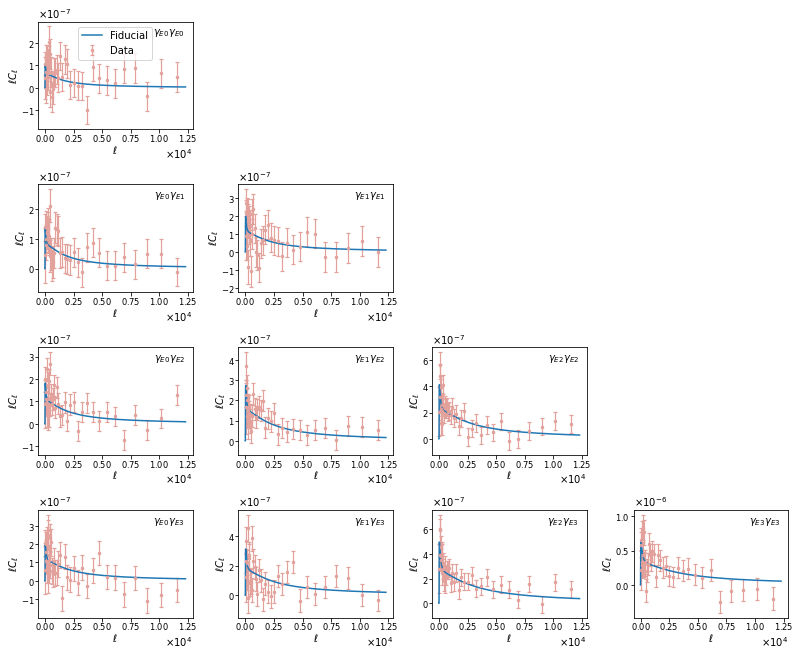

In [60]:
# Plot the auto-correlation and the cross-correlation
plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_ee'
weightpow = 1
logscale=False
savefig=True
# with plt.rc_context()
# matplotlib.rcParams.update(rcParamsAndrina)
fig = plt.figure(figsize=(11, 9), constrained_layout=True)
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.01, wspace=0.05)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])

    ax = plt.subplot(gs[jx, ix])

    ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
    errs = np.sqrt(np.diag(cov))

    ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                linestyle='None', marker='.', markersize=5, elinewidth=1.2, capthick=1.2, capsize=1.7, \
                label=r'Data')
    ax.plot(th_ell, th_cls_all[ix * 2, jx*2] * th_ell**weightpow, label='Fiducial')
    
#     if ix == jx:
#         ell, nls, nls_ind = snls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
#         ax.plot(ell,nls * np.power(ell,weightpow), label=r'Noise')



    ax.set_xlabel(r'$\ell$',  labelpad=-0.1)
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$', labelpad=-0.1)
    
    if ix == 0 and jx == 0:
        ax.legend(loc='upper center') #, frameon=False)

    ax.text(0.95, 0.95, '$\gamma_{{E{0}}}\gamma_{{E{1}}}$'.format(ix, jx),
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes)
    
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')
        
    ax.tick_params(axis='both', which='both', pad=0, labelsize='small')
    ax.ticklabel_format(style='sci',scilimits=(0,0), axis='both', useMathText=True)

if savefig:
#     plt.tight_layout()
    plt.savefig(path2figs + 'Cls-ee.pdf')
plt.show()
plt.close()

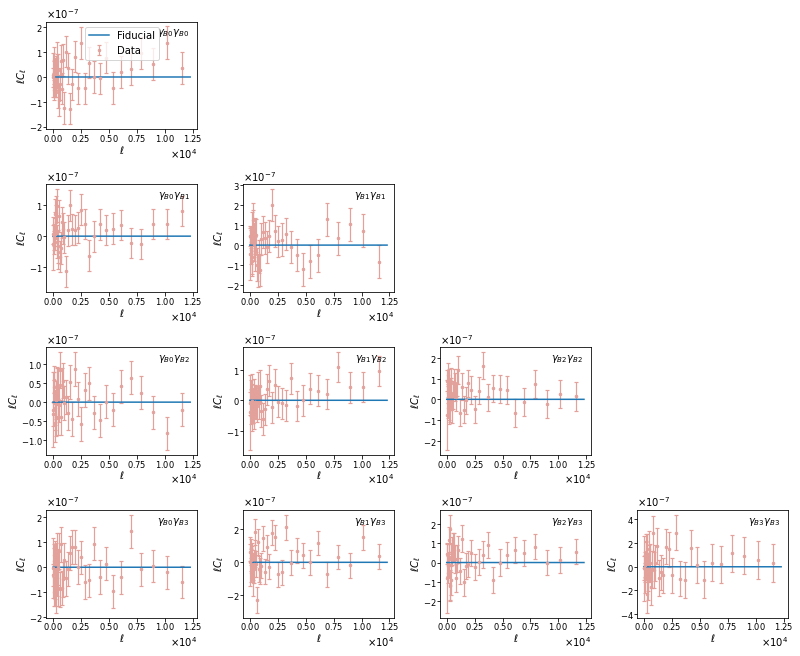

In [62]:
# Plot the auto-correlation and the cross-correlation
plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_bb'
weightpow = 1
logscale=False
savefig=True
# with plt.rc_context()
# matplotlib.rcParams.update(rcParamsAndrina)
fig = plt.figure(figsize=(11, 9), constrained_layout=True)
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.01, wspace=0.05)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])

    ax = plt.subplot(gs[jx, ix])

    ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
    errs = np.sqrt(np.diag(cov))

    ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                linestyle='None', marker='.', markersize=5, elinewidth=1.2, capthick=1.2, capsize=1.7, \
                label=r'Data')
    ax.plot(th_ell, th_cls_all[ix * 2+1, jx*2+1] * th_ell**weightpow, label='Fiducial')
    
#     if ix == jx:
#         ell, nls, nls_ind = snls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
#         ax.plot(ell,nls * np.power(ell,weightpow), label=r'Noise')



    ax.set_xlabel(r'$\ell$',  labelpad=-0.1)
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$', labelpad=-0.1)
    
    if ix == 0 and jx == 0:
        ax.legend(loc='upper center') #, frameon=False)

    ax.text(0.95, 0.95, '$\gamma_{{B{0}}}\gamma_{{B{1}}}$'.format(ix, jx),
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes)
    
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')
        
    ax.tick_params(axis='both', which='both', pad=0, labelsize='small')
    ax.ticklabel_format(style='sci',scilimits=(0,0), axis='both', useMathText=True)

if savefig:
#     plt.tight_layout()
    plt.savefig(path2figs + 'Cls-bb.pdf')
plt.show()
plt.close()

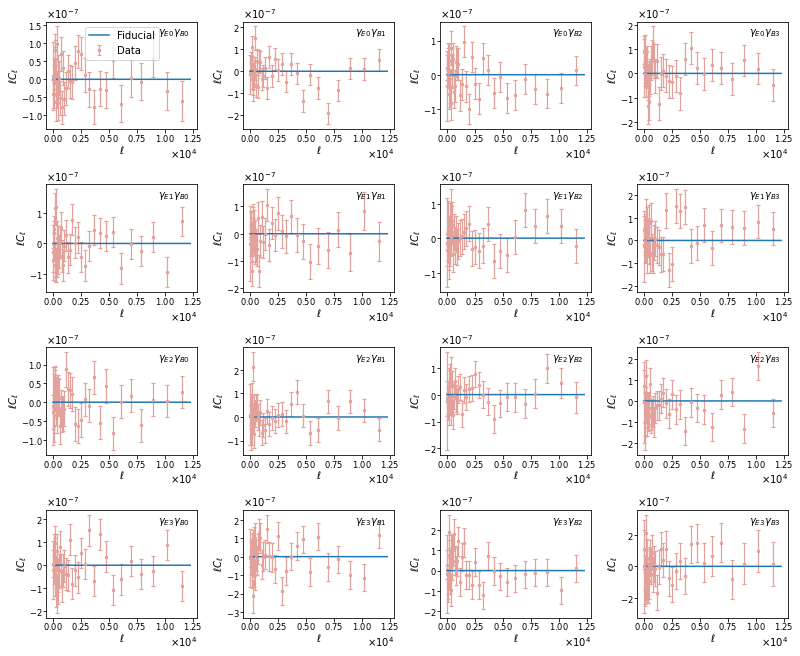

In [71]:
# Plot the auto-correlation and the cross-correlation
plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_bb'
weightpow = 1
logscale=False
savefig=True
# with plt.rc_context()
# matplotlib.rcParams.update(rcParamsAndrina)
fig = plt.figure(figsize=(11, 9), constrained_layout=True)
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.01, wspace=0.05)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])
    
    if tra1 == tra2:
        dt = ['cl_eb']
    else:
        dt = ['cl_eb', 'cl_be']

    for dt1 in dt:
        if dt1 == 'cl_eb':
            ax = plt.subplot(gs[ix, jx])
            text = '$\gamma_{{E{0}}}\gamma_{{B{1}}}$'.format(ix, jx)
            thi = 0
            thj = 1
        else:
            ax = plt.subplot(gs[jx, ix])
            text = '$\gamma_{{E{0}}}\gamma_{{B{1}}}$'.format(jx, ix)
            thi = 1
            thj = 0


        ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
        errs = np.sqrt(np.diag(cov))

        ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                    linestyle='None', marker='.', markersize=5, elinewidth=1.2, capthick=1.2, capsize=1.7, \
                    label=r'Data')
        ax.plot(th_ell, th_cls_all[ix * 2+thi, jx*2+thj] * th_ell**weightpow, label='Fiducial')
    
#     if ix == jx:
#         ell, nls, nls_ind = snls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
#         ax.plot(ell,nls * np.power(ell,weightpow), label=r'Noise')


        ax.set_xlabel(r'$\ell$',  labelpad=-0.1)
        if weightpow == 0:
            elltext = ''
        elif weightpow == 1:
            elltext = r'$\ell$'
        else:
            elltext = r'$\ell^{{{}}}$'.format(weightpow)
        ax.set_ylabel(elltext + r'$C_{\ell}$', labelpad=-0.1)

        if ix == 0 and jx == 0:
            ax.legend(loc='upper center') #, frameon=False)

        ax.text(0.95, 0.95, text,
                horizontalalignment='right', verticalalignment='top',
                transform=ax.transAxes)
        if logscale:
            ax.set_xscale('log')
            ax.set_yscale('log')

        ax.tick_params(axis='both', which='both', pad=0, labelsize='small')
        ax.ticklabel_format(style='sci',scilimits=(0,0), axis='both', useMathText=True)

if savefig:
    plt.savefig(path2figs + 'Cls-eb.pdf')
plt.show()
plt.close()

## Old way

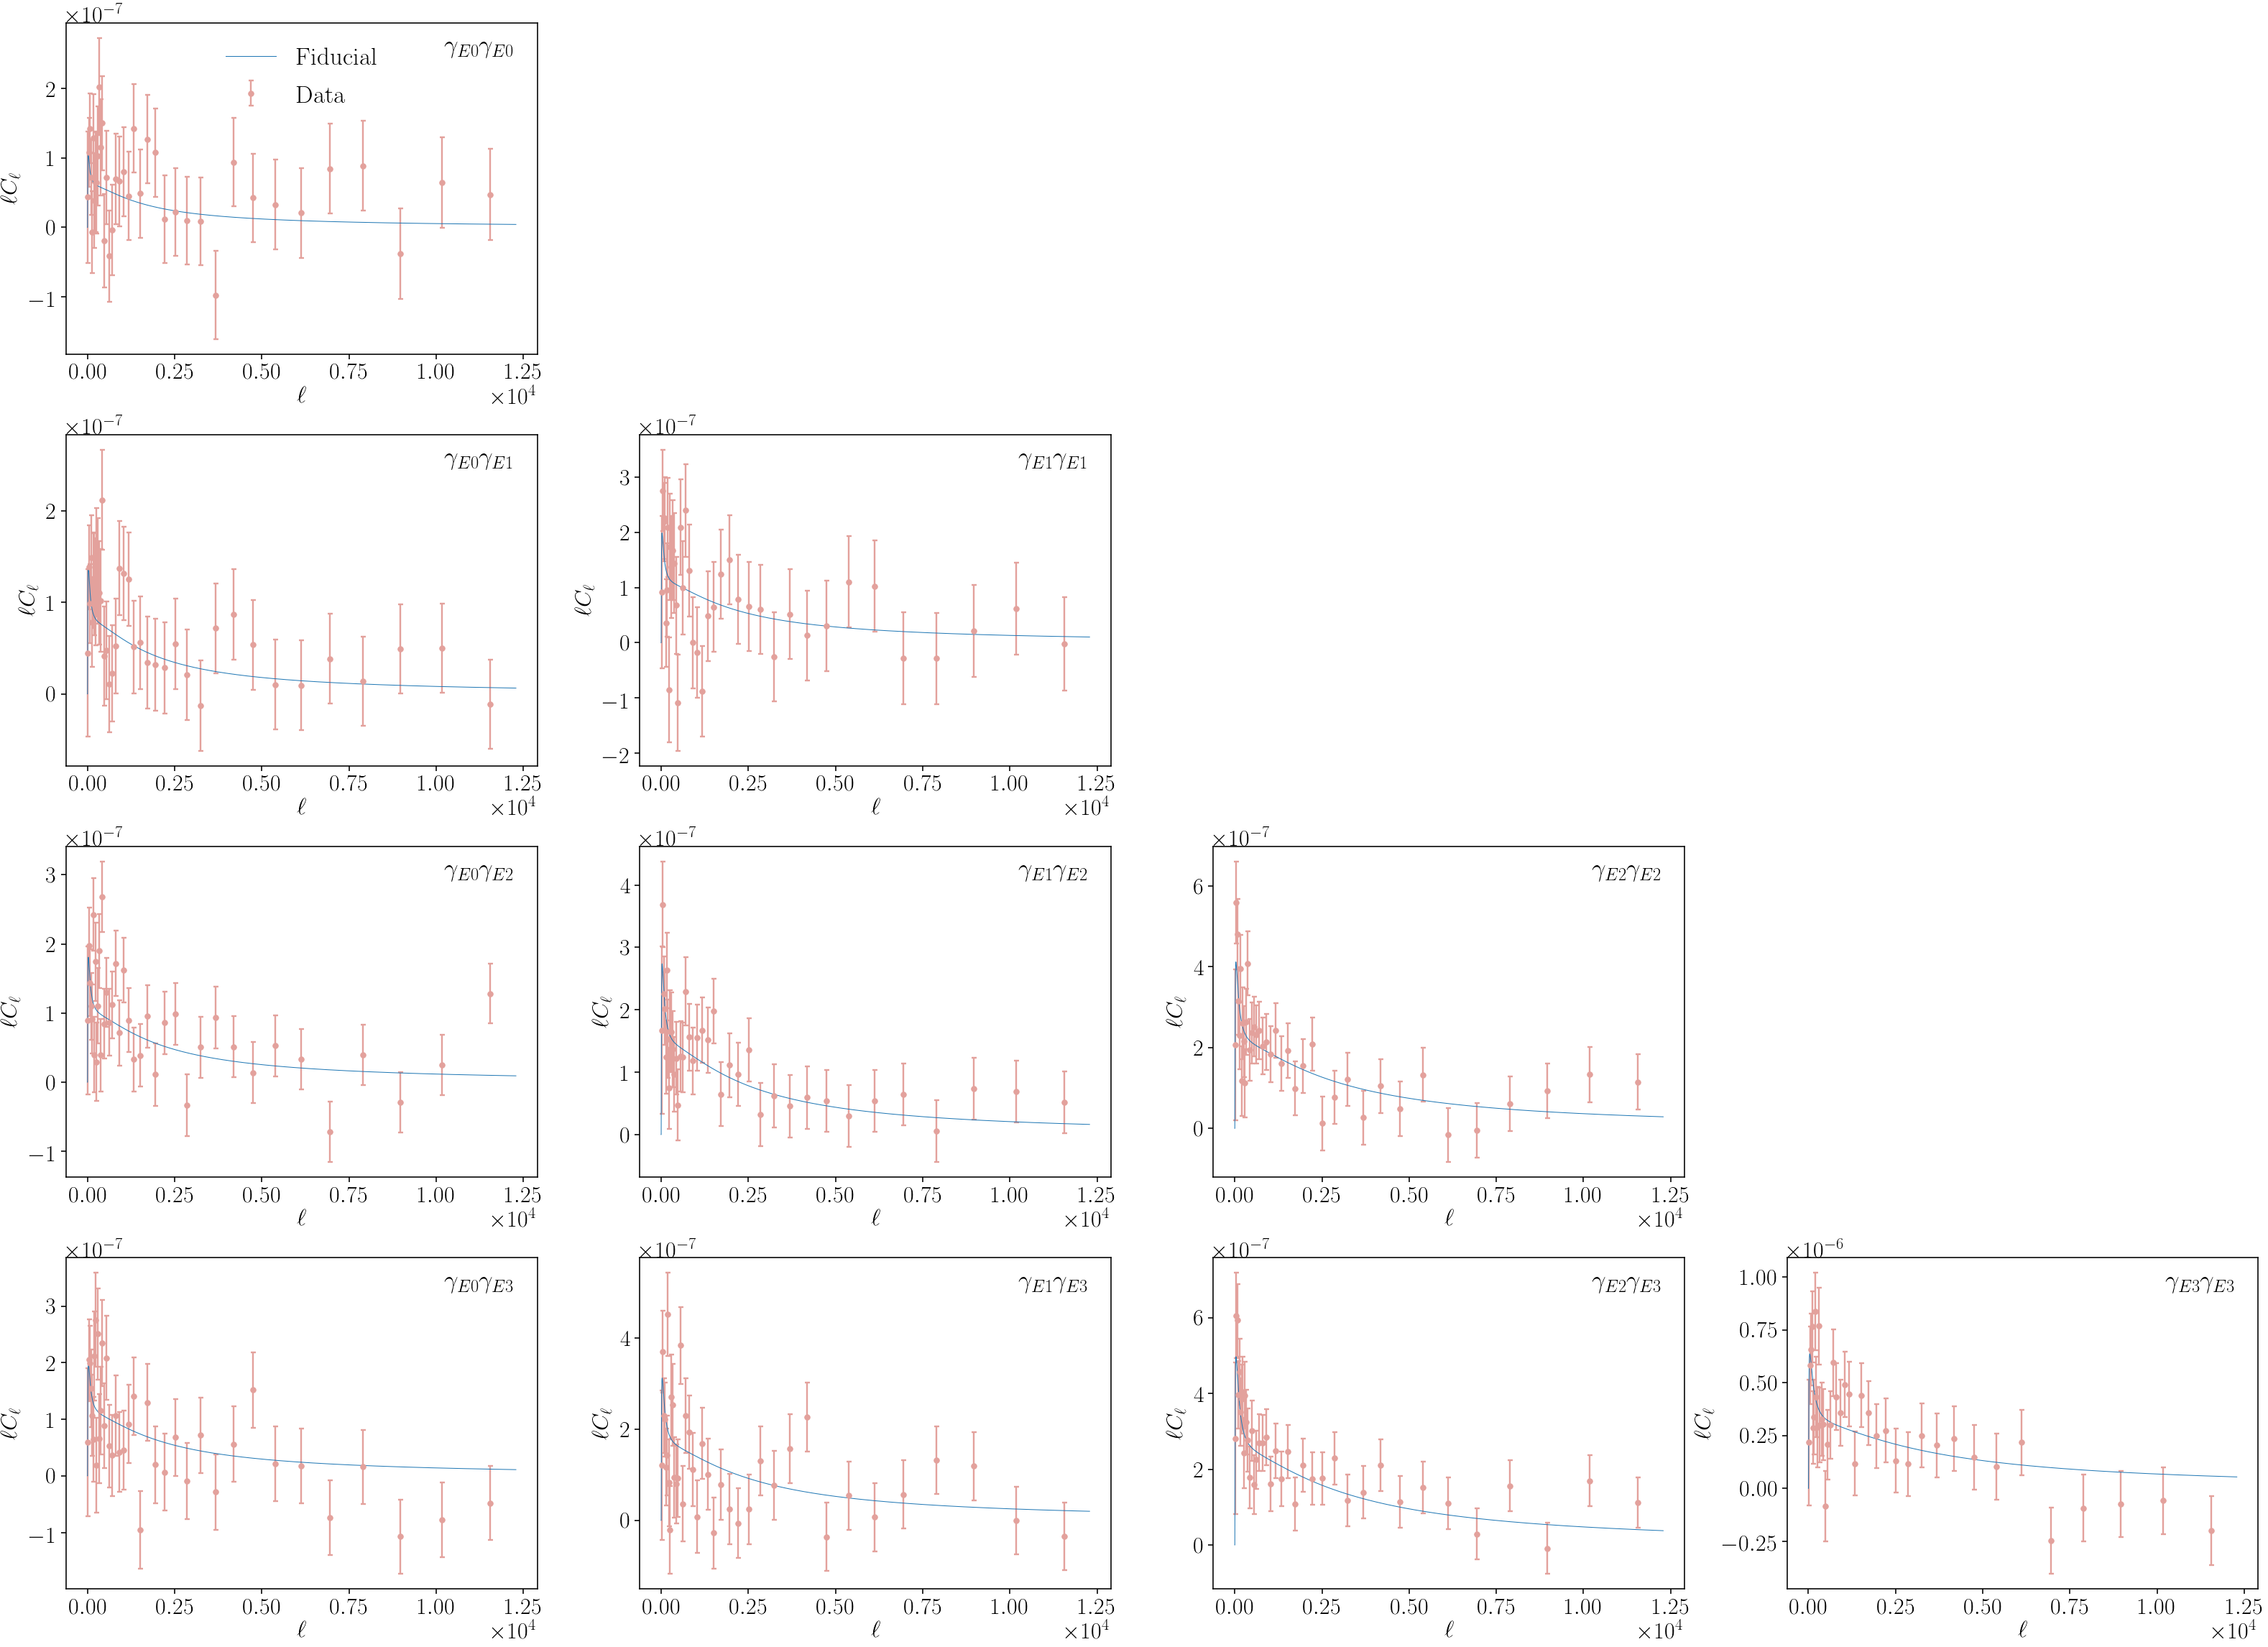

In [3]:
# Plot the auto-correlation and the cross-correlation
plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_ee'
weightpow = 1
logscale=False
savefig=False
#
matplotlib.rcParams.update(rcParamsAndrina)
fig = plt.figure(figsize=(44, 32))
gs = gridspec.GridSpec(4, 4)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])

    ax = plt.subplot(gs[jx, ix])

    ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
    errs = np.sqrt(np.diag(cov))

    ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                linestyle='None', marker='.', markersize=15, elinewidth=2.4, capthick=2.4, capsize=3.5, \
                label=r'Data')
    ax.plot(th_ell, th_cls_all[ix * 2, jx*2] * th_ell**weightpow, label='Fiducial')
    
#     if ix == jx:
#         ell, nls, nls_ind = snls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
#         ax.plot(ell,nls * np.power(ell,weightpow), label=r'Noise')



    ax.set_xlabel(r'$\ell$')
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$')
    
    if ix == 0 and jx == 0:
        ax.legend(loc='upper center', prop={'size':35})
#     else:
#         ax.legend(loc='best', prop={'size':35})
        
    ax.ticklabel_format(style='sci',scilimits=(-1,4),axis='both')
    
    ax.text(0.95, 0.95, '$\gamma_{{E{0}}}\gamma_{{E{1}}}$'.format(ix, jx),
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes , fontsize=35)
    
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

# if savefig:
#     plt.tight_layout()
#     plt.savefig(path2figs + 'Cls-ee.pdf')
plt.show()
plt.close()
matplotlib.rcParams = rcParamsDefault.copy()

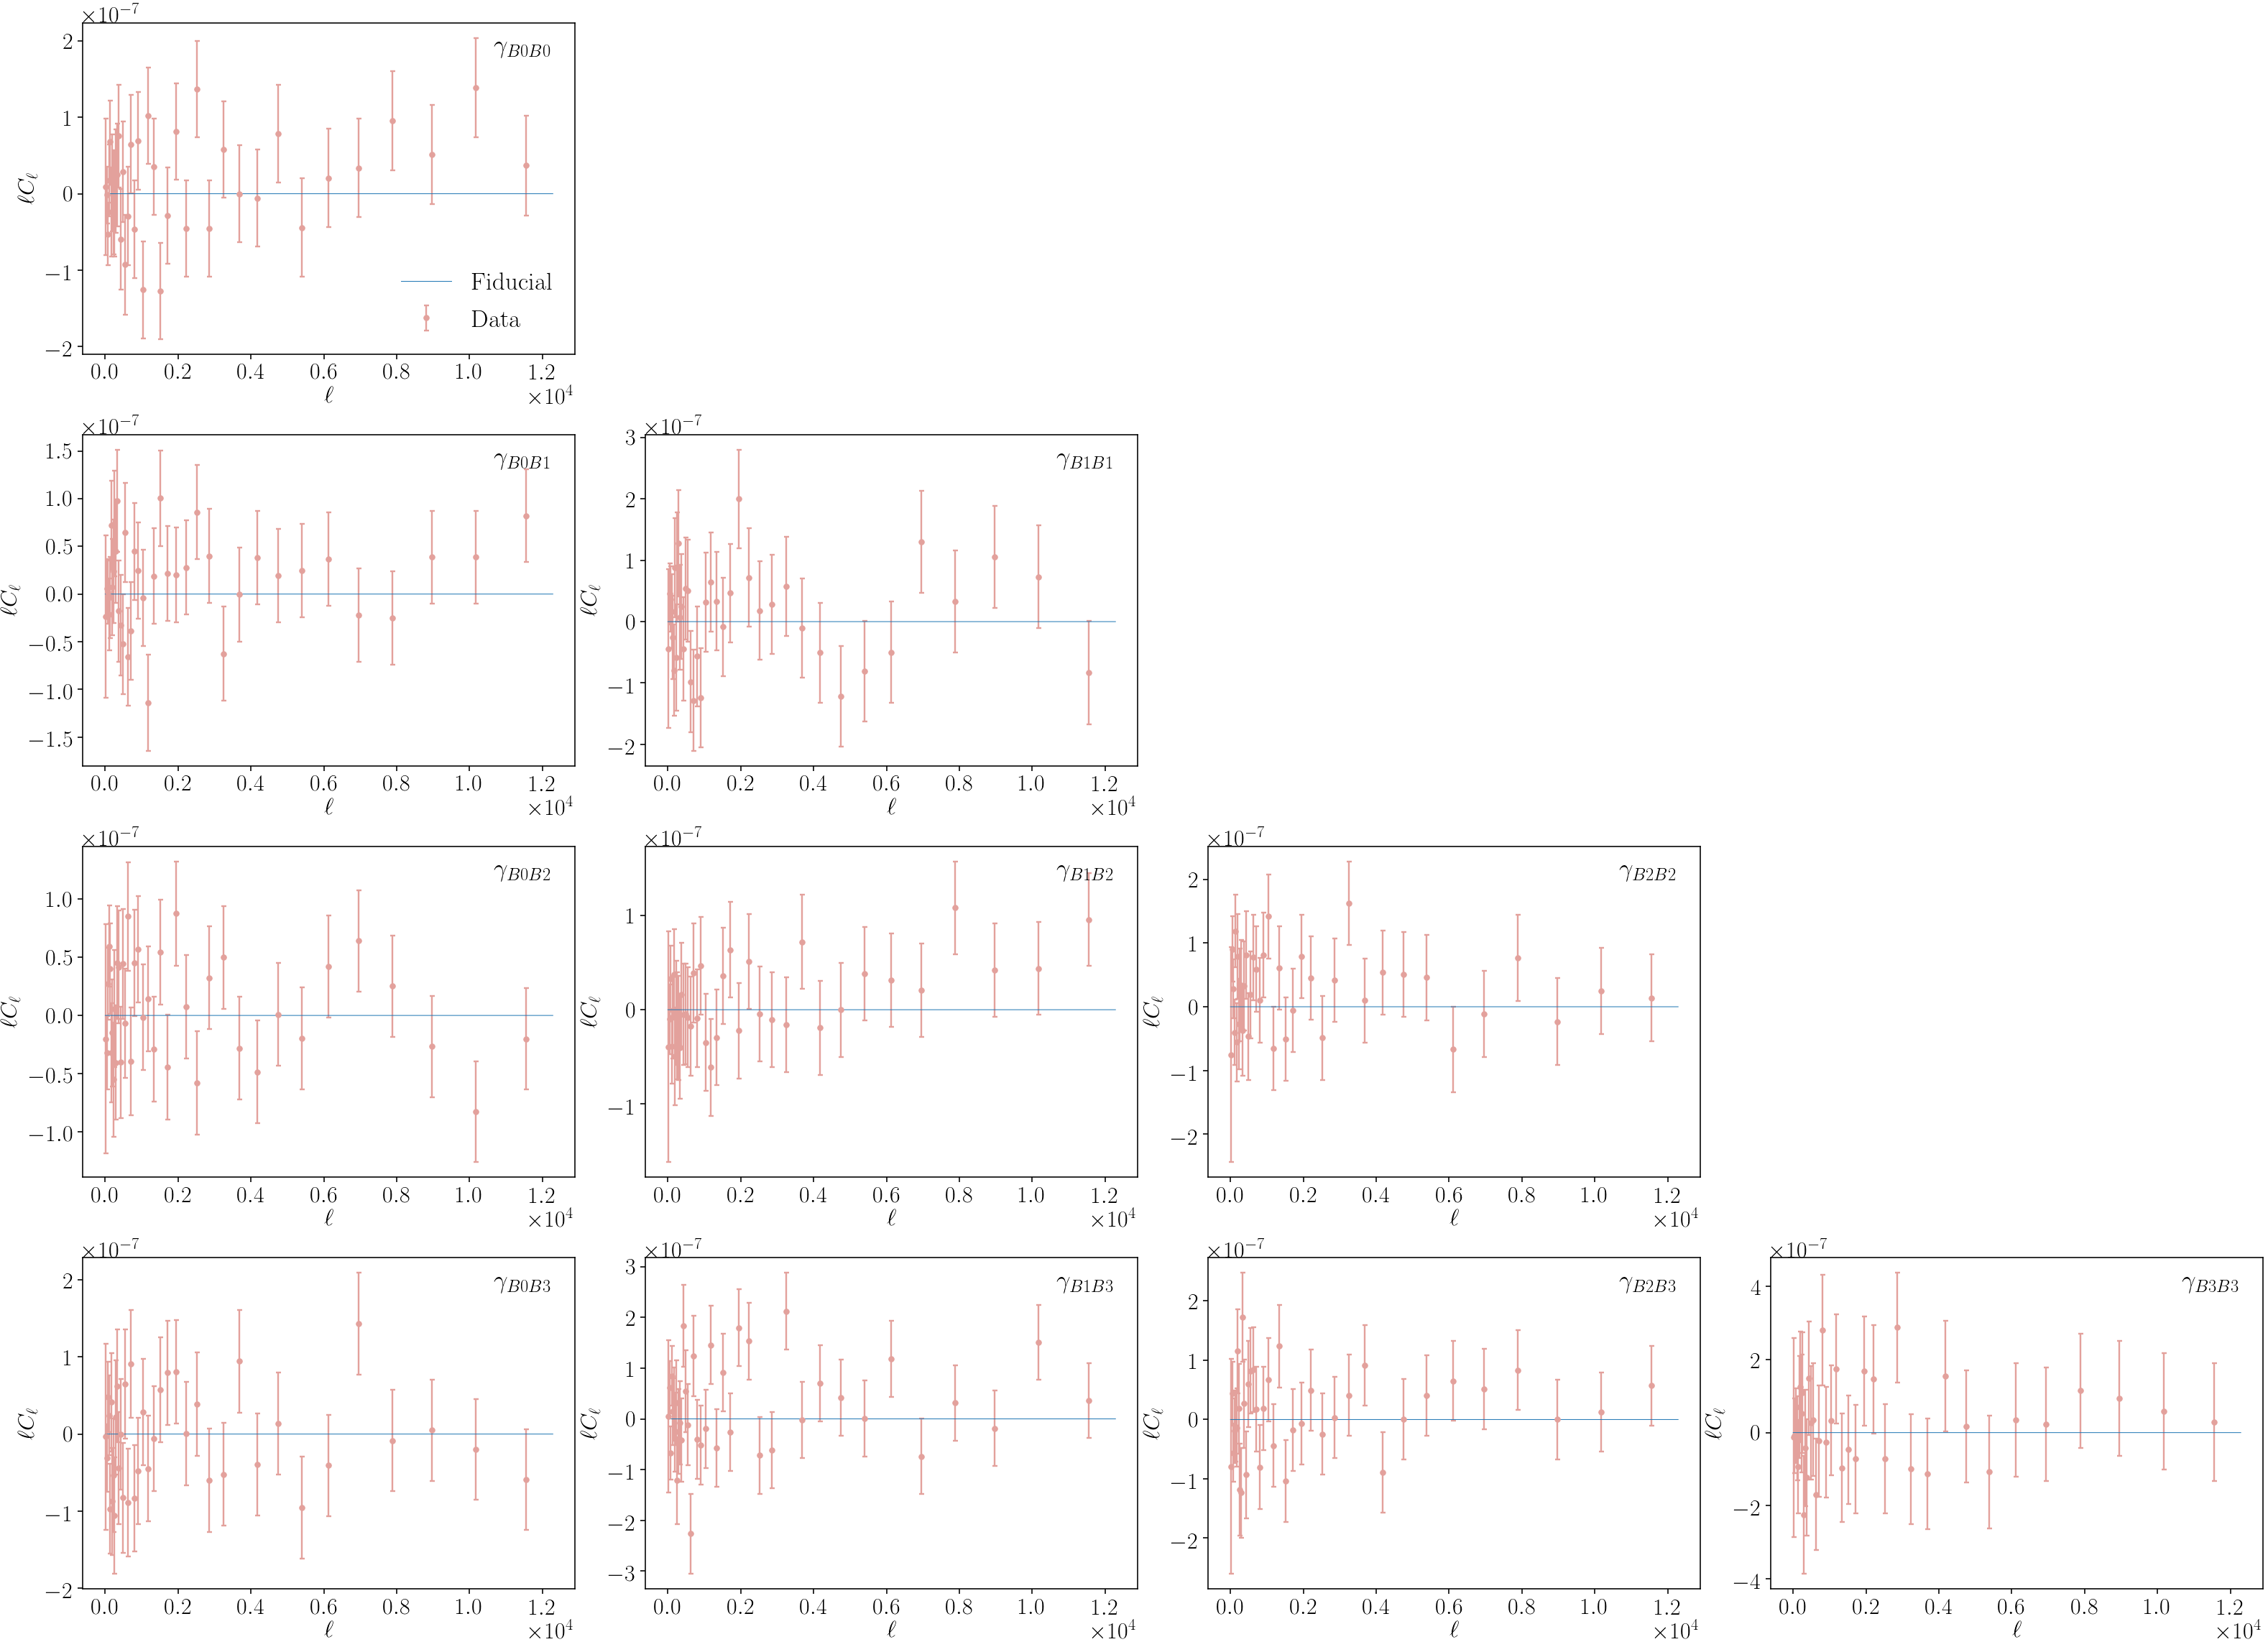

In [10]:
# Plot the auto-correlation and the cross-correlation
plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_bb'
weightpow = 1
logscale=False
savefig=True
#
matplotlib.rcParams.update(rcParamsAndrina)
fig = plt.figure(figsize=(44, 32))
gs = gridspec.GridSpec(4, 4)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])

    ax = plt.subplot(gs[jx, ix])

    ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
    errs = np.sqrt(np.diag(cov))

    ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                linestyle='None', marker='.', markersize=15, elinewidth=2.4, capthick=2.4, capsize=3.5, \
                label=r'Data')
    ax.plot(th_ell, th_cls_all[ix * 2+1, jx*2+1] * th_ell**weightpow, label='Fiducial')
    
#     if ix == jx:
#         ell, nls, nls_ind = snls.get_ell_cl(dt1, tra1, tra2, return_ind=True)
#         ax.plot(ell,nls * np.power(ell,weightpow), label=r'Noise')



    ax.set_xlabel(r'$\ell$')
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$')
    
    if ix == 0 and jx == 0:
        ax.legend(loc='best', prop={'size':35})
#     else:
#         ax.legend(loc='best', prop={'size':35})
        
    ax.ticklabel_format(style='sci',scilimits=(-1,4),axis='both')
    
    ax.text(0.95, 0.95, '$\gamma_{{B{0}B{1}}}$'.format(ix, jx),
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes, fontsize=35)
    
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

# if savefig:
#     plt.tight_layout()
#     plt.savefig(path2figs + 'Cls-bb.pdf')
plt.show()
plt.close()
matplotlib.rcParams = rcParamsDefault

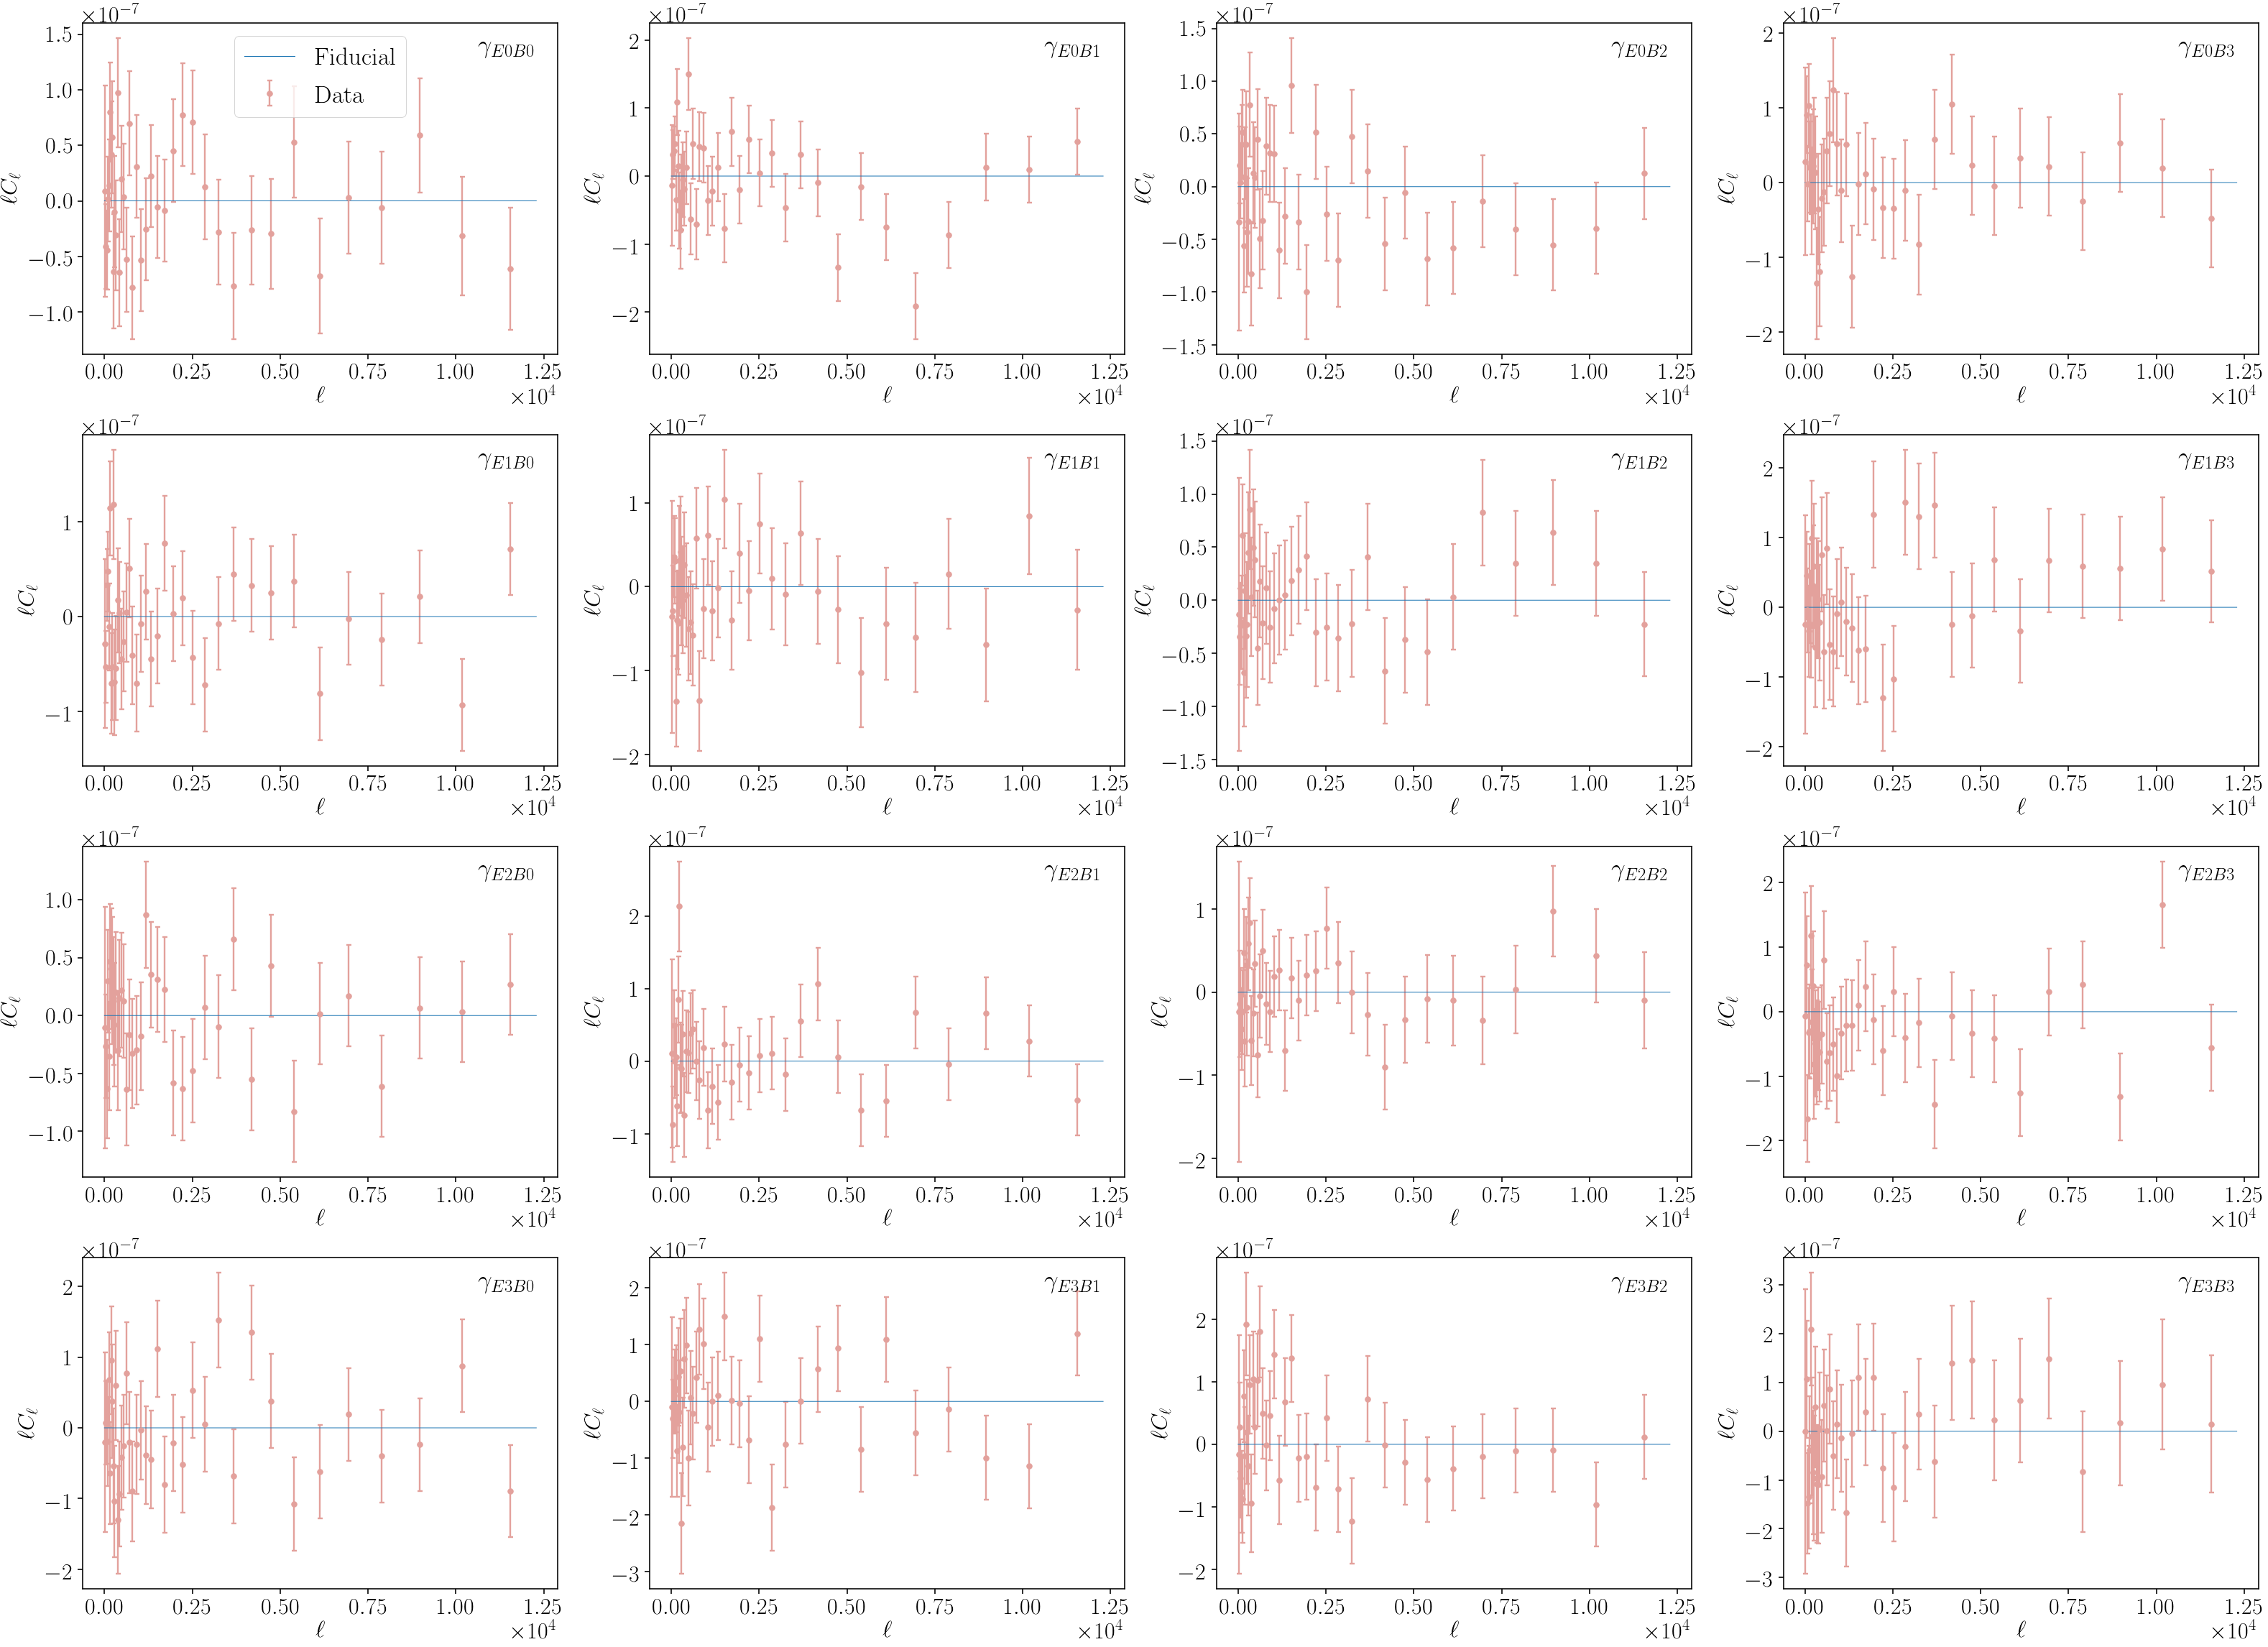

In [55]:
# Plot the auto-correlation and the cross-correlation
matplotlib.rcParams.update(rcParamsAndrina)
#

plot_pairs = scls.get_tracer_combinations()
dt1 = 'cl_eb'
weightpow = 1
logscale=False
savefig=True
#
fig = plt.figure(figsize=(44, 32))
gs = gridspec.GridSpec(4, 4)

for i, (tra1, tra2) in enumerate(plot_pairs):
    ix = int(tra1[-1])
    jx = int(tra2[-1])
    
    if tra1 == tra2:
        dt = ['cl_eb']
    else:
        dt = ['cl_eb', 'cl_be']

    for dt1 in dt:
        if dt1 == 'cl_eb':
            ax = plt.subplot(gs[ix, jx])
            text = '$\gamma_{{E{0}}}\gamma_{{B{1}}}$'.format(ix, jx)
            thi = 0
            thj = 1
        else:
            ax = plt.subplot(gs[jx, ix])
            text = '$\gamma_{{E{0}}}\gamma_{{B{1}}}$'.format(jx, ix)
            thi = 1
            thj = 0

        ell, cls, cov, ind = scls.get_ell_cl(dt1, tra1, tra2, return_cov=True, return_ind=True)
        errs = np.sqrt(np.diag(cov))

        ax.errorbar(ell,cls * np.power(ell,weightpow),yerr=errs * np.power(ell,weightpow), color=colors[0], \
                    linestyle='None', marker='.', markersize=15, elinewidth=2.4, capthick=2.4, capsize=3.5, \
                    label=r'Data')
        ax.plot(th_ell, th_cls_all[ix * 2+thi, jx*2+thj] * th_ell**weightpow, label='Fiducial')

        ax.set_xlabel(r'$\ell$')
        if weightpow == 0:
            elltext = ''
        elif weightpow == 1:
            elltext = r'$\ell$'
        else:
            elltext = r'$\ell^{{{}}}$'.format(weightpow)
        ax.set_ylabel(elltext + r'$C_{\ell}$')

        if ix == 0 and jx == 0:
            ax.legend(loc='upper center', prop={'size':35}, frameon=True)

        
        ax.text(0.95, 0.95, text,
                horizontalalignment='right', verticalalignment='top',
                transform=ax.transAxes, fontsize=35)

        ax.ticklabel_format(style='sci',scilimits=(-1,4),axis='both')

        if logscale:
            ax.set_xscale('log')
            ax.set_yscale('log')

# if savefig:
#     plt.tight_layout()
#     plt.savefig(path2figs + 'Cls-eb.pdf')
plt.show()
plt.close()

# Comvat: Sims vs NKA (1024 nside) for wl1-wl1

In [13]:
#########################
# Prefix
simsdir = '../Cls/test_covmat/sims_gc3wl1_metacal_1024_new_niter0/'
prefix = simsdir + 'run_gc3_wl1_all'
path2data_1024 = '/mnt/extraspace/gravityls_3/S8z/Cls/all_together_metacal_1024_new_niter0_true/'
path2cov_1024 = path2data_1024 + 'cov_new_fiducial/'

######

# Functions from PCLCovariance project
# https://github.com/damonge/PCLCovariance/blob/master/notebooks/common.py
FIGSIZE = (4, 3)
def plot_chi2(chi2s, labels, lmax, bins=60, text='', foutput=None, legend=True, axi=None, ylabel=True):
    "Copied from https://github.com/damonge/PCLCovariance/blob/master/notebooks/common.py"
    if axi is None:
        f, ax = plt.subplots(1, 1, figsize=(4,3))
    else:
        ax = axi
    _, x, _ = ax.hist(chi2s, bins=bins, histtype='step', density=True, label=labels)

    ax.plot(x[:-1], stats.chi2.pdf(x[:-1], lmax), ls='--', label=r'$\chi^2$ pdf')

    ax.set_xlabel(r'$\chi^2$')
    if ylabel:
        ax.set_ylabel('pdf')
    
    if legend:
        ax.legend(loc=0, frameon=False)
    if text:
        ax.text(0.05, 0.95, text,
        horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes)
    if axi is None:
        plt.tight_layout()
        if foutput is not None:
            plt.savefig(foutput)
        plt.show()
        plt.close()
    
def correlation_matrix(covariance):
    c = np.diag(covariance)
    return covariance / np.sqrt(c * c[:, None])

def get_correlation_from_covariance(array_of_covs):
    array_of_corrs = []
    for Cov in array_of_covs:
        array_of_corrs.append(correlation_matrix(Cov))

    return array_of_corrs

def plot_correlation_difference(lbins, CovSims, CovTh, labelTh='Th', foutput=None):
    CorrSims, CorrTh = get_correlation_from_covariance([CovSims, CovTh])

    f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    diff = CorrSims - CorrTh
    lim = np.abs(diff).max()
    plt.imshow(diff, vmin=-lim, vmax=lim)
    c = plt.colorbar()
    c.set_label('CorrSims - Corr{}'.format(labelTh))
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$\ell$')

    lbins = lbins.astype(int)
    ticks = np.linspace(0, len(lbins)-1, 7, dtype=int)

    plt.xticks(ticks, lbins[ticks])
    plt.yticks(ticks, lbins[ticks])

    plt.tight_layout()
    if foutput is not None:
        fname = foutput + '_correlation_difference'
        plt.savefig(fname, dpi=DPI)

    plt.show()
    plt.close()

    return CorrSims, CorrTh

In [4]:
# Noise
nlee = np.loadtxt(prefix + '_nlth.txt', usecols=-4)
nlbb = np.loadtxt(prefix + '_nlth.txt', usecols=-1)

# Simulations
gc0gc0 = np.load(prefix + '_clsims_0001-10000.npz')
ells = gc0gc0['l']
cls_sims = gc0gc0['cl22']
cls_sims_mean = np.mean(cls_sims, axis=0)
nsims = cls_sims.shape[0]

# Fiducial reconstructed
# cls_fid_reconst = np.loadtxt(prefix + '_clth.txt', usecols=4)
CovThCheck = np.load(path2cov_1024 + 'cov_s2222_b6666.npz')['arr_0'].reshape(ells.size, 4, ells.size, 4)
CovTh = np.load(prefix + '_covTh.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)
CovThOld = np.load(prefix + '_covThold.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)

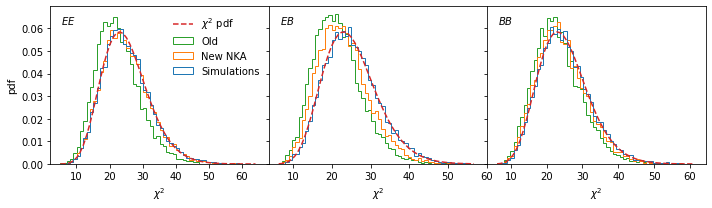

In [28]:
# Load Cls, covariances, compute inverses and chi2
def plot_chi2_auto(dt, lmax=None, legend=True, correct_factor=False, ax=None, ylabel=True):
    if dt == 'cl_ee':
        ix = 0
        text = r"$EE$"
    elif (dt == 'cl_eb') or (dt == 'cl_be'):
        ix = 1
        text = r"$EB$"     
    elif dt == 'cl_bb':
        ix = 3
        text = r"$BB$"

    #
    if lmax:
        imax = np.where(~(ells < lmax))[0][0]
        dof = imax
    else:
        imax = None
        dof = ells.size


    CovSims = np.cov(cls_sims[:, ix, :imax].T)
    cf = 1
    if correct_factor:
        cf = (nsims - 2 - dof)/(nsims - 1)
    iCovSims = cf * np.linalg.inv(CovSims)
    #
    iCovTh = np.linalg.inv(CovTh[:imax, ix, :imax, ix])
    iCovThCheck = np.linalg.inv(CovThCheck[:imax, ix, :imax, ix])
    iCovThOld = np.linalg.inv(CovThOld[:imax, ix, :imax, ix])

    chi2_sims = np.ones(nsims) * (-1)
    chi2_Th = np.ones(nsims) * (-1)
    chi2_ThCheck = np.ones(nsims) * (-1)
    chi2_ThOld = np.ones(nsims) * (-1)

    for i in range(nsims):
        delta = cls_sims[i, ix, :imax] - cls_sims_mean[ix, :imax]
        chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
        chi2_Th[i] = (delta).dot(iCovTh).dot(delta)
        chi2_ThCheck[i] = (delta).dot(iCovThCheck).dot(delta)
        chi2_ThOld[i] = (delta).dot(iCovThOld).dot(delta)
        
    plot_chi2([chi2_sims, chi2_Th, chi2_ThOld], ['Simulations', 'New NKA', 'Old'], dof,
              text=text, foutput=path2figs + 'chi2-{}-lmax-{}.pdf'.format(dt[-2:], lmax),
             legend=legend, axi=ax, ylabel=ylabel)
#     plot_chi2([chi2_sims, chi2_Th, chi2_ThCheck], ['Simulations', 'NaMaster', 'Check'], ells.size, text=text)

# plot_chi2_auto('cl_ee', lmax=2024, legend=True) #, correct_factor=True)
# plot_chi2_auto('cl_eb', lmax=2024, legend=False) #, correct_factor=True)
# plot_chi2_auto('cl_bb', lmax=2024, legend=False) #, correct_factor=True)

f, axs = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'hspace': 0, 'wspace': 0}, sharey=True)
plot_chi2_auto('cl_ee', lmax=2024, legend=True, ax=axs[0])
plot_chi2_auto('cl_eb', lmax=2024, legend=False, ax=axs[1], ylabel=False)
plot_chi2_auto('cl_bb', lmax=2024, legend=False, ax=axs[2], ylabel=False)
plt.tight_layout()
f.savefig(path2figs + 'chi2_ii_lmax_{}.pdf'.format(2024))
plt.show()
plt.close()

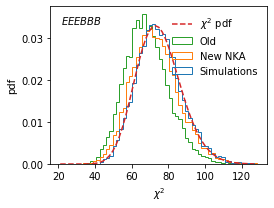

In [16]:
# Load Cls, covariances, compute inverses and chi2

lmax = 2024
if lmax > ells[-1]:
    imax = ells.size
else:
    imax = np.where(~(ells < lmax))[0][0]
dof = 3*imax

ixd = {'cl_ee': 0, 
       'cl_eb': 1,
       'cl_bb': 3}
nells = ells[:imax].size
cls_sims_arr = np.zeros((nsims, dof))
cls_sims_arr[:, :nells] = cls_sims[:, 0, :imax]
cls_sims_arr[:, nells : 2*nells] = cls_sims[:, 1, :imax]
cls_sims_arr[:, 2*nells :] = cls_sims[:, 3, :imax]

cls_sims_mean_arr = np.mean(cls_sims_arr, axis=0)
CovSims = np.cov(cls_sims_arr.T)

CovTh_ar = np.zeros((nells * 3, nells * 3))
CovThOld_ar = np.zeros((nells * 3, nells * 3))
for i, dt1 in enumerate(['cl_ee', 'cl_eb', 'cl_bb']):
    ix = ixd[dt1]
    for j, dt2 in enumerate(['cl_ee', 'cl_eb', 'cl_bb'][i:], i):
        jx = ixd[dt2]
        CovTh_ar[i * nells: (i + 1) * nells, j * nells: (j + 1)*nells] = CovTh[:imax, ix, :imax, jx]
        CovTh_ar[j * nells: (j + 1) * nells, i * nells: (i + 1)*nells] = CovTh[:imax, ix, :imax, jx].T
        CovThOld_ar[i * nells: (i + 1) * nells, j * nells: (j + 1)*nells] = CovThOld[:imax, ix, :imax, jx]
        CovThOld_ar[j * nells: (j + 1) * nells, i * nells: (i + 1)*nells] = CovThOld[:imax, ix, :imax, jx].T

iCovSims = np.linalg.inv(CovSims)
iCovTh = np.linalg.inv(CovTh_ar)
iCovThOld = np.linalg.inv(CovThOld_ar)

chi2_sims = np.ones(nsims) * (-1)
chi2_Th = np.ones(nsims) * (-1)
chi2_ThOld = np.ones(nsims) * (-1)

for i in range(nsims):
    delta = cls_sims_arr[i] - cls_sims_mean_arr
    chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
    chi2_Th[i] = (delta).dot(iCovTh).dot(delta)
    chi2_ThOld[i] = (delta).dot(iCovThOld).dot(delta)
    
plot_chi2([chi2_sims, chi2_Th, chi2_ThOld], ['Simulations', 'New NKA', 'Old'], dof,
          text='$EEEBBB$', foutput=path2figs + 'chi2-eeebbb-lmax-{}.pdf'.format(lmax))

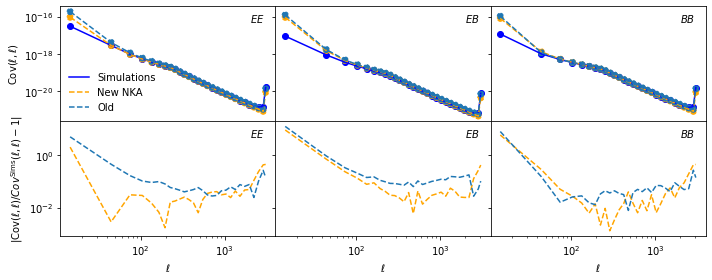

In [27]:
# Load Cls, covariances, compute inverses and chi2
def plot_diagcov_auto(dt, savefig=False, axi=None, legend=True, ylabel=True):
    if dt == 'cl_ee':
        ix = 0
        text = r"$EE$"
    elif (dt == 'cl_eb'):
        ix = 1
        text = r"$EB$"
    elif (dt == 'cl_be'):
        ix = 2
        text = r"$BE$"  
    elif dt == 'cl_bb':
        ix = 3
        text = r"$BB$"

    #
    CovSims = np.cov(cls_sims[:, ix, :].T)

    if axi is None:
        f, ax = plt.subplots(1, 1, figsize =(4, 3))
    else:
        ax = axi
    ax.plot(ells, np.diag(CovSims), c='b', label='Simulations')
    ax.plot(ells, np.diag(CovTh[:, ix, :, ix]), ls='--', c='orange', label='New NKA')
    ax.plot(ells, np.diag(CovThOld[:, ix, :, ix]), ls='--', label='Old')

    ax.scatter(ells, np.diag(CovSims), c='b')
    ax.scatter(ells, np.diag(CovTh[:, ix, :, ix]), ls='--', c='orange')
    ax.scatter(ells, np.diag(CovThOld[:, ix, :, ix]), ls='--')
    ax.set_xlabel(r'$\ell$')
    if ylabel:
        ax.set_ylabel(r'Cov$(\ell, \ell)$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.text(0.95, 0.95, text,
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes)
    
    if legend:
        ax.legend(loc='lower left', frameon=False)
    if axi is None:
        plt.tight_layout()
        if savefig:
            plt.savefig(path2figs + 'cov_diag_{}.pdf'.format(dt))
        plt.show()
        plt.close()
        
#########
def plot_diagcov_auto_rd(dt, savefig=False, axi=None, legend=False, ylabel=True):
    if dt == 'cl_ee':
        ix = 0
        text = r"$EE$"
    elif (dt == 'cl_eb') or (dt == 'cl_be'):
        ix = 1
        text = r"$EB$"     
    elif dt == 'cl_bb':
        ix = 3
        text = r"$BB$"

    #
    CovSims = np.cov(cls_sims[:, ix, :].T)
    if axi is None:
        f, ax = plt.subplots(1, 1, figsize =(4, 3))
    else:
        ax = axi
    dCovSims = np.diag(CovSims)
    
    ax.plot(ells, np.abs(np.diag(CovTh[:, ix, :, ix]) / dCovSims - 1), ls='--', c='orange', label='New NKA')
    ax.plot(ells, np.abs(np.diag(CovThOld[:, ix, :, ix]) / dCovSims -1), ls='--', label='Old')

    ax.set_xlabel(r'$\ell$')
    if ylabel:
        ax.set_ylabel(r'|Cov$(\ell, \ell)/Cov^{\rm Sims}(\ell, \ell) -1|$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.text(0.95, 0.95, text,
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes)
    if legend:
        ax.legend(loc='upper center', frameon=False)
    if axi is None:
        plt.show()
        plt.close()
    
# plot_diagcov_auto('cl_ee', True)
# plot_diagcov_auto('cl_eb', True)
# # plot_diagcov_auto('cl_be')
# plot_diagcov_auto('cl_bb', True)
f, axs = plt.subplots(2, 3, figsize=(10, 4), gridspec_kw={'hspace': 0, 'wspace': 0}, sharey='row')
plot_diagcov_auto('cl_ee', True, axi=axs[0, 0])
plot_diagcov_auto('cl_eb', True, axi=axs[0, 1], legend=False, ylabel=False)
plot_diagcov_auto('cl_bb', True, axi=axs[0, 2], legend=False, ylabel=False)
plot_diagcov_auto_rd('cl_ee', True, axi=axs[1, 0], legend=False)
plot_diagcov_auto_rd('cl_eb', True, axi=axs[1, 1], legend=False, ylabel=False)
plot_diagcov_auto_rd('cl_bb', True, axi=axs[1, 2], legend=False, ylabel=False)
plt.tight_layout()
f.savefig(path2figs + 'cov_diag_ii.pdf')
plt.show()
plt.close()

## Debug

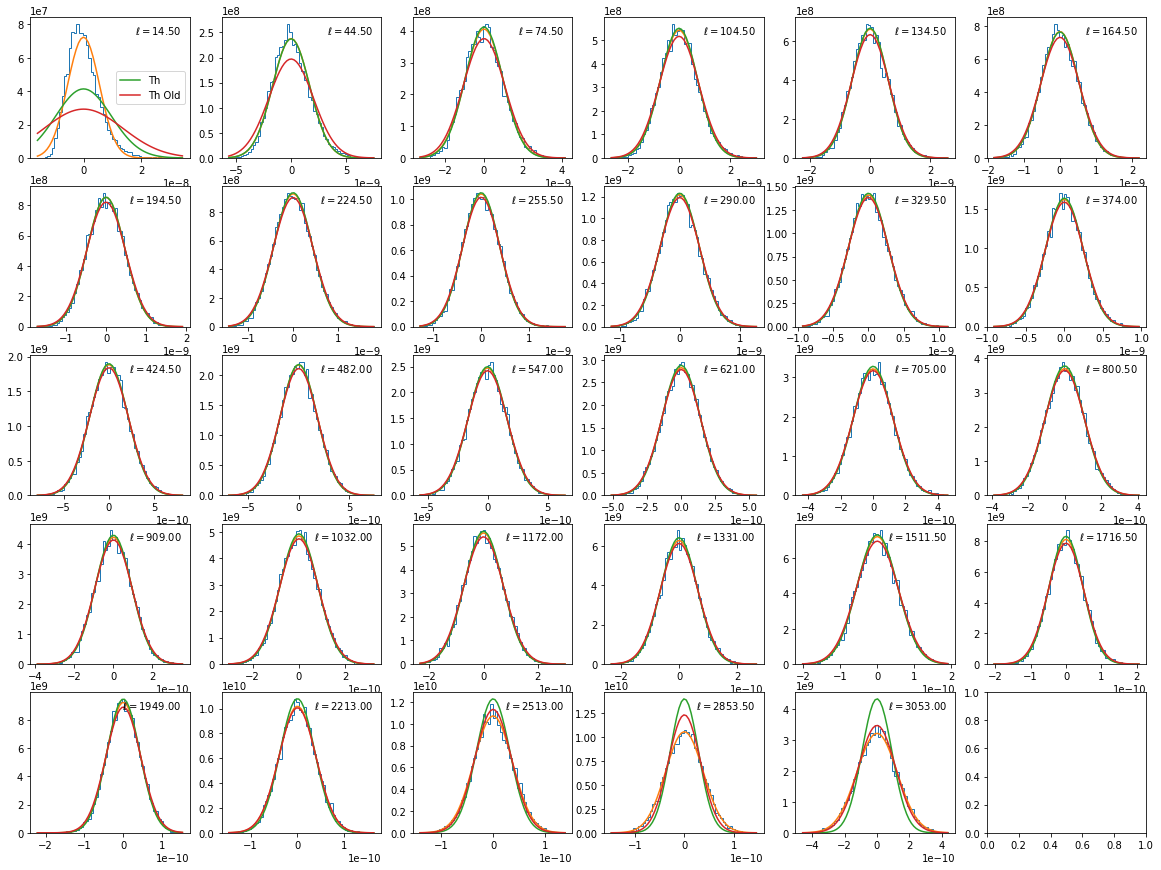

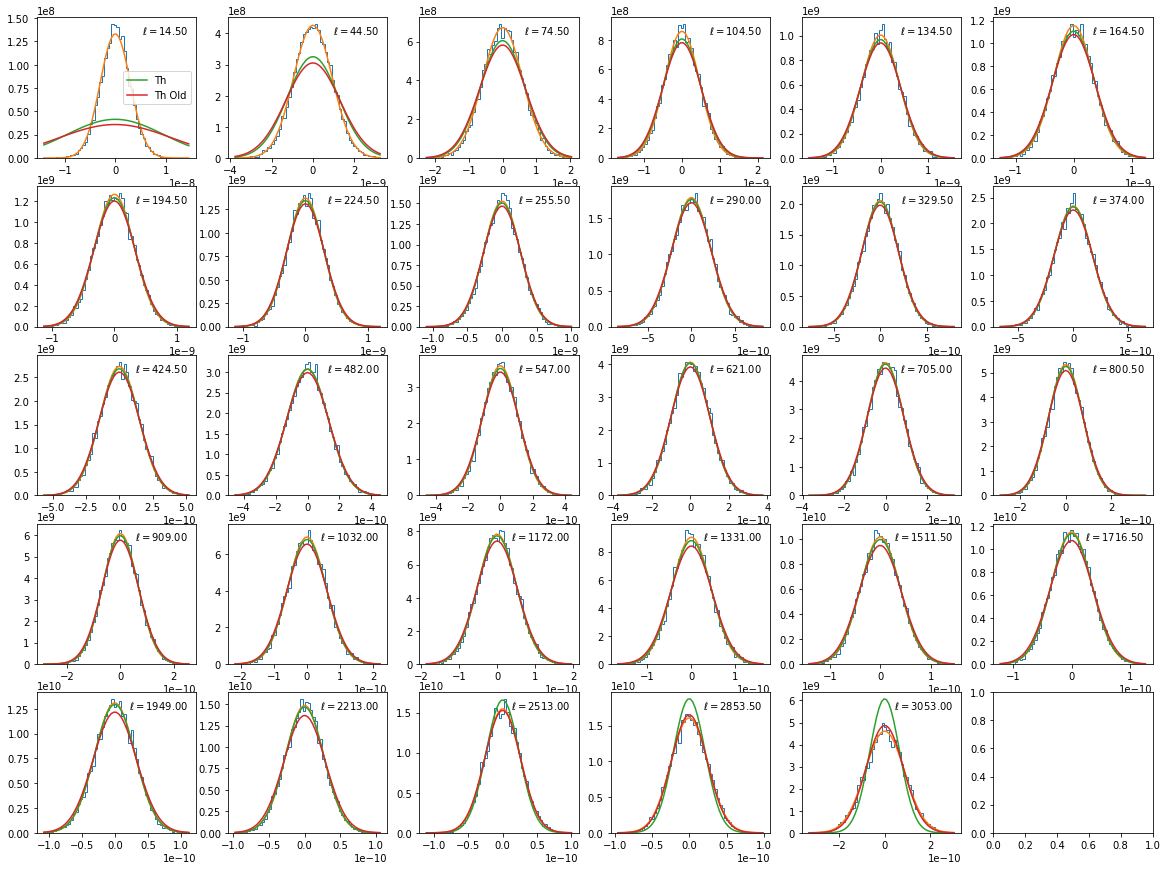

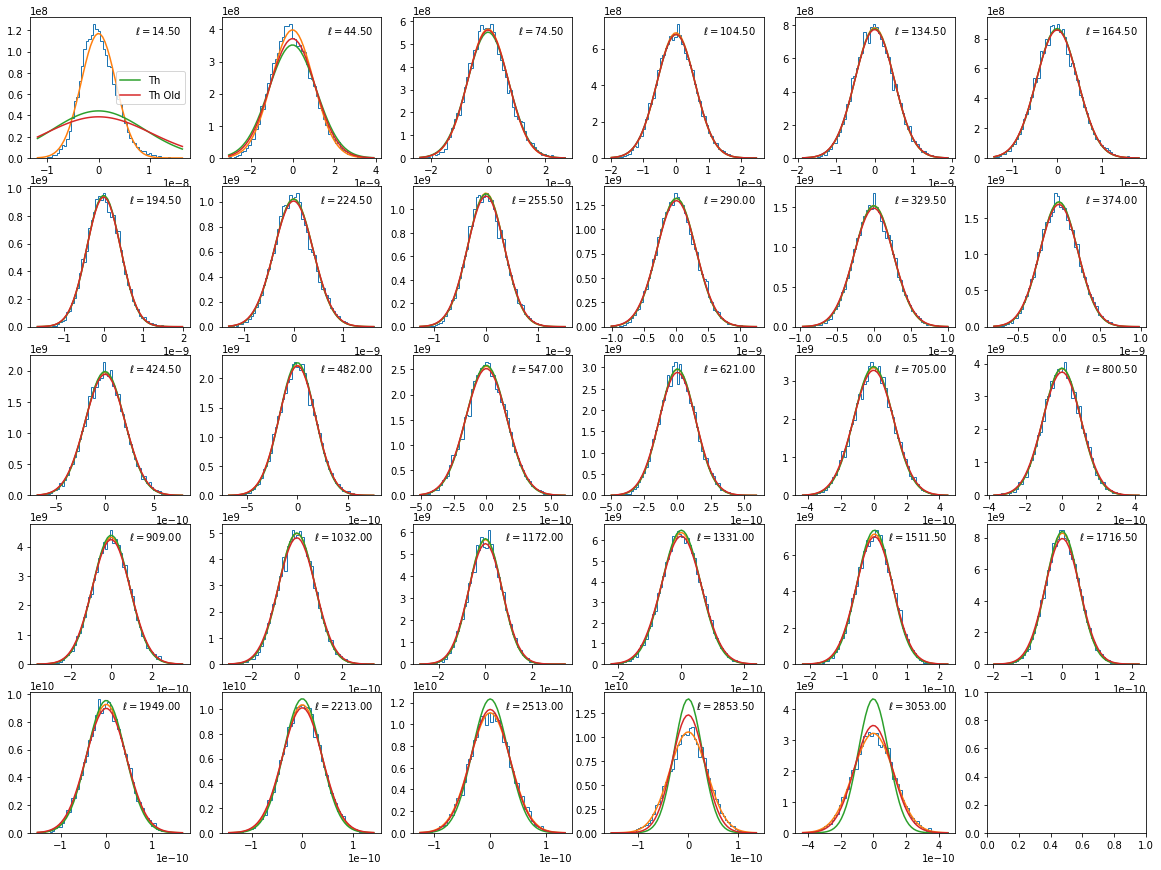

In [93]:
def plot_cl_gauss(dt):
    f, axs = plt.subplots(5, 6, figsize=(20, 15)) #, gridspec_kw={'hspace': 0, 'wspace':0})
    axs = axs.reshape((-1))
    
    ixd = {'cl_ee': 0,
           'cl_eb': 1,
           'cl_be': 2,
           'cl_bb': 3}
    ix = ixd[dt]
    
    CovSims = np.cov(cls_sims[:, ix].T)

    for i in range(ells.size):
        ax = axs[i]
        cl = cls_sims[:, ix, i]
        cl_mean = cls_sims_mean[ix, i]
        sigma = np.sqrt(CovSims[i, i])
        sigmaTh = np.sqrt(CovTh[i, ix, i, ix])
        sigmaThOld = np.sqrt(CovThOld[i, ix, i, ix])
        h, x, _ = ax.hist(cl-cl_mean, bins=60, histtype='step', density=True)
        ax.plot(x, stats.norm.pdf(x, 0, sigma))
        ax.plot(x, stats.norm.pdf(x, 0, sigmaTh), label='Th')
        ax.plot(x, stats.norm.pdf(x, 0, sigmaThOld), label='Th Old')
        ax.text(0.95, 0.95, r'$\ell = {:.2f}$'.format(ells[i]),
                horizontalalignment='right', verticalalignment='top',
                transform=ax.transAxes)
    axs[0].legend(loc='center right')
    plt.show()
    plt.close()
plot_cl_gauss('cl_ee')
plot_cl_gauss('cl_eb')
plot_cl_gauss('cl_bb')

### EE

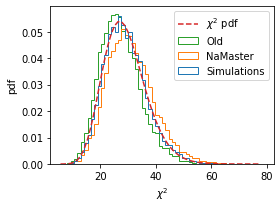

In [6]:
# Noise
nlee = np.loadtxt(prefix + '_nlth.txt', usecols=-4)
nlbb = np.loadtxt(prefix + '_nlth.txt', usecols=-1)

# Fiducial reconstructed
cls_fid_reconst = np.loadtxt(prefix + '_clth.txt', usecols=4)

# Load Cls, covariances, compute inverses and chi2

gc0gc0 = np.load(prefix + '_clsims_0001-10000.npz')
ells = gc0gc0['l']
cls_sims = gc0gc0['cl22'][:, 0, :]

nsims = cls_sims.shape[0]
cls_sims_mean = np.mean(cls_sims, axis=0)

CovSims = np.cov(cls_sims.T)
CovTh = np.load(prefix + '_covTh.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 0, :, 0]
CovThOld = np.load(prefix + '_covThold.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 0, :, 0]
# CovTh2 = np.load(path2cov_1024 + 'cov_DESwl1_DESwl1_DESwl1_DESwl1.npz')['arr_0']

iCovSims = np.linalg.inv(CovSims)
iCovTh = np.linalg.inv(CovTh)
iCovThOld = np.linalg.inv(CovThOld)
# iCovTh2 = np.linalg.inv(CovTh2)

chi2_sims = np.ones(nsims) * (-1)
chi2_Th = np.ones(nsims) * (-1)
chi2_ThOld = np.ones(nsims) * (-1)
# chi2_Th2 = np.ones(nsims) * (-1)

for i in range(nsims):
    delta = cls_sims[i] - cls_sims_mean
    chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
    chi2_Th[i] = (delta).dot(iCovTh).dot(delta)
    chi2_ThOld[i] = (delta).dot(iCovThOld).dot(delta)
#     chi2_Th2[i] = (delta).dot(iCovTh2).dot(delta)
    
# plot_chi2([chi2_sims, chi2_Th, chi2_Th2], ['Simulations', 'NaMaster', 'Code'], ells.size)
plot_chi2([chi2_sims, chi2_Th, chi2_ThOld], ['Simulations', 'NaMaster', 'Old'], ells.size)

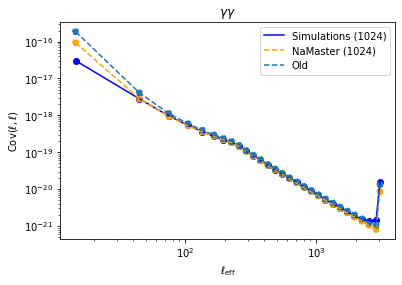

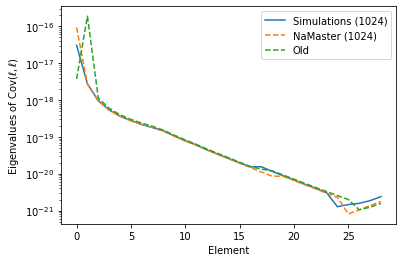

In [7]:
# Check diagonal elements of Covariances and their eigenvalues

plt.plot(ells, np.diag(CovSims), c='b', label='Simulations (1024)')
plt.plot(ells, np.diag(CovTh), ls='--', c='orange', label='NaMaster (1024)')
# plt.plot(ells, np.diag(CovTh2), ls='--', c='black', label='Code (1024)')
plt.plot(ells, np.diag(CovThOld), ls='--', label='Old')

plt.scatter(ells, np.diag(CovSims), c='b')
plt.scatter(ells, np.diag(CovTh), ls='--', c='orange')
# plt.scatter(ells, np.diag(CovTh2), ls='--', c='black')
plt.scatter(ells, np.diag(CovThOld), ls='--')
plt.xlabel(r'$\ell_{\rm eff}$')
plt.ylabel(r'Cov$(\ell, \ell)$')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$\gamma \gamma$')
plt.legend(loc=0)
plt.show()

# # Check eigenvalues
plt.plot(np.linalg.eig(CovSims)[0], label='Simulations (1024)')
plt.plot(np.linalg.eig(CovTh)[0], ls='--', label='NaMaster (1024)')
# plt.plot(np.linalg.eig(CovTh2)[0], ls='--', label='Code (1024)')
plt.plot(np.linalg.eig(CovThOld)[0], ls='--', label='Old')
plt.xlabel(r'Element')
plt.ylabel(r'Eigenvalues of Cov$(\ell, \ell)$')
plt.yscale('log')
plt.legend(loc=0)
plt.show()

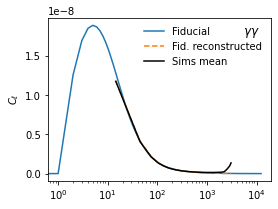

In [8]:
f, ax = plt.subplots(1, 1, figsize=(4,3), gridspec_kw={'hspace': 0}, sharex=True)
ax = [ax]
ax[0].plot(th_ell, th_cls_all[2, 2], label='Fiducial')
ax[0].plot(ells, cls_fid_reconst, ls='--', label='Fid. reconstructed')
ax[0].plot(ells, cls_sims_mean - nlee, c='k', label='Sims mean')
ax[0].set_ylabel(r'$C_\ell$')
# ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].text(0.95, 0.95, r'$\gamma \gamma$', horizontalalignment='right',
      verticalalignment='top', transform=ax[0].transAxes, fontsize=12)
ax[0].legend(loc=0, frameon=False)
plt.show()

### EB

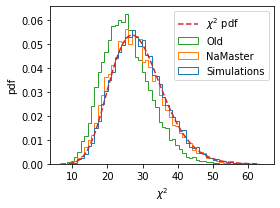

In [10]:
# Noise
nlee = np.loadtxt(prefix + '_nlth.txt', usecols=-4)
nleb = np.loadtxt(prefix + '_nlth.txt', usecols=-3)
nlbb = np.loadtxt(prefix + '_nlth.txt', usecols=-1)

# Fiducial reconstructed
cls_fid_reconst = np.loadtxt(prefix + '_clth.txt', usecols=5)

# Load Cls, covariances, compute inverses and chi2

gc0gc0 = np.load(prefix + '_clsims_0001-10000.npz')
ells = gc0gc0['l']
cls_sims = gc0gc0['cl22'][:, 1, :]

nsims = cls_sims.shape[0]
cls_sims_mean = np.mean(cls_sims, axis=0)

CovSims = np.cov(cls_sims.T)
CovTh = np.load(prefix + '_covTh.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 1, :, 1]
CovThOld = np.load(prefix + '_covThold.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 1, :, 1]
# CovTh2 = np.load(path2cov_1024 + 'cov_DESwl1_DESwl1_DESwl1_DESwl1.npz')['arr_0']

iCovSims = np.linalg.inv(CovSims)
iCovTh = np.linalg.inv(CovTh)
iCovThOld = np.linalg.inv(CovThOld)
# iCovTh2 = np.linalg.inv(CovTh2)

chi2_sims = np.ones(nsims) * (-1)
chi2_Th = np.ones(nsims) * (-1)
chi2_ThOld = np.ones(nsims) * (-1)
# chi2_Th2 = np.ones(nsims) * (-1)

for i in range(nsims):
    delta = cls_sims[i] - cls_sims_mean
    chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
    chi2_Th[i] = (delta).dot(iCovTh).dot(delta)
    chi2_ThOld[i] = (delta).dot(iCovThOld).dot(delta)
#     chi2_Th2[i] = (delta).dot(iCovTh2).dot(delta)
    
# plot_chi2([chi2_sims, chi2_Th, chi2_Th2], ['Simulations', 'NaMaster', 'Code'], ells.size)
plot_chi2([chi2_sims, chi2_Th, chi2_ThOld], ['Simulations', 'NaMaster', 'Old'], ells.size)

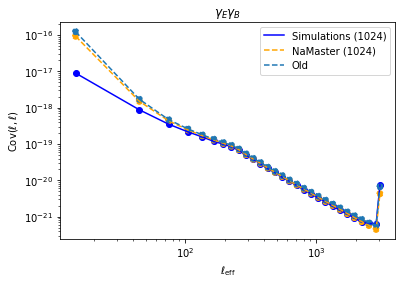

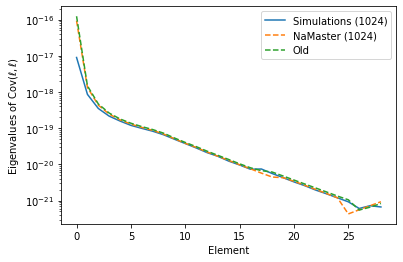

In [11]:
# Check diagonal elements of Covariances and their eigenvalues

plt.plot(ells, np.diag(CovSims), c='b', label='Simulations (1024)')
plt.plot(ells, np.diag(CovTh), ls='--', c='orange', label='NaMaster (1024)')
# plt.plot(ells, np.diag(CovTh2), ls='--', c='black', label='Code (1024)')
plt.plot(ells, np.diag(CovThOld), ls='--', label='Old')

plt.scatter(ells, np.diag(CovSims), c='b')
plt.scatter(ells, np.diag(CovTh), ls='--', c='orange')
# plt.scatter(ells, np.diag(CovTh2), ls='--', c='black')
plt.scatter(ells, np.diag(CovThOld), ls='--')
plt.xlabel(r'$\ell_{\rm eff}$')
plt.ylabel(r'Cov$(\ell, \ell)$')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$\gamma_E \gamma_B$')
plt.legend(loc=0)
plt.show()

# # Check eigenvalues
plt.plot(np.linalg.eig(CovSims)[0], label='Simulations (1024)')
plt.plot(np.linalg.eig(CovTh)[0], ls='--', label='NaMaster (1024)')
# plt.plot(np.linalg.eig(CovTh2)[0], ls='--', label='Code (1024)')
plt.plot(np.linalg.eig(CovThOld)[0], ls='--', label='Old')
plt.xlabel(r'Element')
plt.ylabel(r'Eigenvalues of Cov$(\ell, \ell)$')
plt.yscale('log')
plt.legend(loc=0)
plt.show()

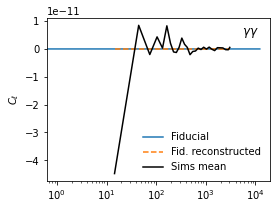

In [12]:
f, ax = plt.subplots(1, 1, figsize=(4,3), gridspec_kw={'hspace': 0}, sharex=True)
ax = [ax]
ax[0].plot(th_ell, th_cls_all[2, 3], label='Fiducial')
ax[0].plot(ells, cls_fid_reconst, ls='--', label='Fid. reconstructed')
ax[0].plot(ells, cls_sims_mean, c='k', label='Sims mean')
ax[0].set_ylabel(r'$C_\ell$')
# ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].text(0.95, 0.95, r'$\gamma \gamma$', horizontalalignment='right',
      verticalalignment='top', transform=ax[0].transAxes, fontsize=12)
ax[0].legend(loc=0, frameon=False)
plt.show()

### BB

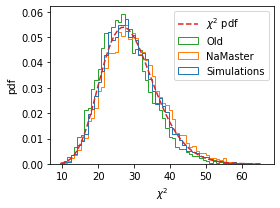

In [13]:
# Noise
nlee = np.loadtxt(prefix + '_nlth.txt', usecols=-4)
nlbb = np.loadtxt(prefix + '_nlth.txt', usecols=-1)

# Fiducial reconstructed
cls_fid_reconst = np.loadtxt(prefix + '_clth.txt', usecols=7)

# Load Cls, covariances, compute inverses and chi2

gc0gc0 = np.load(prefix + '_clsims_0001-10000.npz')
ells = gc0gc0['l']
cls_sims = gc0gc0['cl22'][:, 3, :]

nsims = cls_sims.shape[0]
cls_sims_mean = np.mean(cls_sims, axis=0)

CovSims = np.cov(cls_sims.T)
CovTh = np.load(prefix + '_covTh.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 3, :, 3]
CovThOld = np.load(prefix + '_covThold.npz')['cw22_22'].reshape(ells.size, 4, ells.size, 4)[:, 3, :, 3]
# CovTh2 = np.load(path2cov_1024 + 'cov_DESwl1_DESwl1_DESwl1_DESwl1.npz')['arr_0']

iCovSims = np.linalg.inv(CovSims)
iCovTh = np.linalg.inv(CovTh)
iCovThOld = np.linalg.inv(CovThOld)
# iCovTh2 = np.linalg.inv(CovTh2)

chi2_sims = np.ones(nsims) * (-1)
chi2_Th = np.ones(nsims) * (-1)
chi2_ThOld = np.ones(nsims) * (-1)
# chi2_Th2 = np.ones(nsims) * (-1)

for i in range(nsims):
    delta = cls_sims[i] - cls_sims_mean
    chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
    chi2_Th[i] = (delta).dot(iCovTh).dot(delta)
    chi2_ThOld[i] = (delta).dot(iCovThOld).dot(delta)
#     chi2_Th2[i] = (delta).dot(iCovTh2).dot(delta)
    
# plot_chi2([chi2_sims, chi2_Th, chi2_Th2], ['Simulations', 'NaMaster', 'Code'], ells.size)
plot_chi2([chi2_sims, chi2_Th, chi2_ThOld], ['Simulations', 'NaMaster', 'Old'], ells.size)

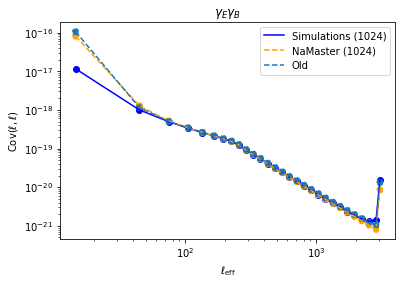

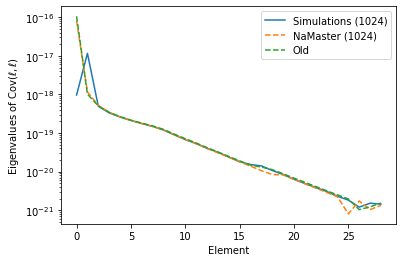

In [14]:
# Check diagonal elements of Covariances and their eigenvalues

plt.plot(ells, np.diag(CovSims), c='b', label='Simulations (1024)')
plt.plot(ells, np.diag(CovTh), ls='--', c='orange', label='NaMaster (1024)')
# plt.plot(ells, np.diag(CovTh2), ls='--', c='black', label='Code (1024)')
plt.plot(ells, np.diag(CovThOld), ls='--', label='Old')

plt.scatter(ells, np.diag(CovSims), c='b')
plt.scatter(ells, np.diag(CovTh), ls='--', c='orange')
# plt.scatter(ells, np.diag(CovTh2), ls='--', c='black')
plt.scatter(ells, np.diag(CovThOld), ls='--')
plt.xlabel(r'$\ell_{\rm eff}$')
plt.ylabel(r'Cov$(\ell, \ell)$')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$\gamma_E \gamma_B$')
plt.legend(loc=0)
plt.show()

# # Check eigenvalues
plt.plot(np.linalg.eig(CovSims)[0], label='Simulations (1024)')
plt.plot(np.linalg.eig(CovTh)[0], ls='--', label='NaMaster (1024)')
# plt.plot(np.linalg.eig(CovTh2)[0], ls='--', label='Code (1024)')
plt.plot(np.linalg.eig(CovThOld)[0], ls='--', label='Old')
plt.xlabel(r'Element')
plt.ylabel(r'Eigenvalues of Cov$(\ell, \ell)$')
plt.yscale('log')
plt.legend(loc=0)
plt.show()

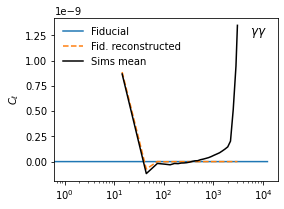

In [15]:
f, ax = plt.subplots(1, 1, figsize=(4,3), gridspec_kw={'hspace': 0}, sharex=True)
ax = [ax]
ax[0].plot(th_ell, th_cls_all[3, 3], label='Fiducial')
ax[0].plot(ells, cls_fid_reconst, ls='--', label='Fid. reconstructed')
ax[0].plot(ells, cls_sims_mean - nlbb, c='k', label='Sims mean')
ax[0].set_ylabel(r'$C_\ell$')
# ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].text(0.95, 0.95, r'$\gamma \gamma$', horizontalalignment='right',
      verticalalignment='top', transform=ax[0].transAxes, fontsize=12)
ax[0].legend(loc=0, frameon=False)
plt.show()

# Maps and masks for wl1

Use `plot_maps_ibin.py`. Below some tests to make the labels work.

In [4]:
# Some tests
msk = hp.read_map('/mnt/extraspace/damonge/S8z_data/derived_products/des_shear/map_metacal_bin0_w_ns512.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


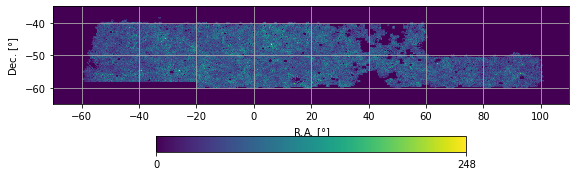

In [102]:
vmin = 0
vmax = 248

nside = 512
xsize = 2000
ysize = int(xsize/2)

lon = np.linspace(-70, 110, xsize)
lat = np.linspace(-65, -35, ysize)
LON, LAT = np.meshgrid(lon, lat)
grid_pix = hp.ang2pix(nside, LON, LAT, lonlat=True)
grid_mask = msk[grid_pix]

f = plt.figure(figsize=(8, 2.5))
ax = f.add_subplot(111)
image = ax.pcolormesh(LON, LAT, grid_mask[:, ::-1],
                       vmin=vmin, vmax=vmax,
                       rasterized=True)

ax.set_xlabel('R.A. [$\degree$]')
ax.set_ylabel('Dec. [$\degree$]')

cb = f.colorbar(image, orientation='horizontal',
                  shrink=.6, pad=0.21, ticks=[vmin, vmax])

# remove white space around figure
spacing = 0.1
plt.subplots_adjust(bottom=spacing, top=1-spacing/2,
                    left=spacing/1.2, right=1-spacing/5)

plt.grid(True)
plt.show()
# plt.tight_layout()
f.savefig('./prueba.pdf')
plt.close()

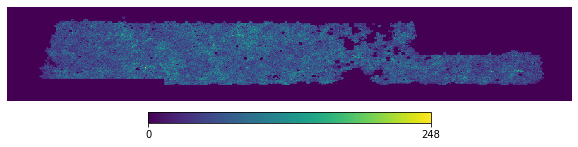

In [94]:
f = plt.figure(1, figsize=(8,2))
hp.cartview(msk, fig=1, lonra=[-70, 110], latra=[-65, -35], title='', 
           margins=(0.01, 0.1, 0.01, 0.005), min=vmin, max=vmax, cbar=True)


# MCMC

## Removed first bpw

In [4]:
path2MP = '/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio'
path2sh = os.path.join(path2MP, 'chains/cl_cross_corr_v2_lmin')
chain_sh = getdist.loadMCSamples(os.path.join(path2sh, '2020-09-09_1000000_'),
                           settings={'ignore_rows':0.5})
p = chain_sh.getParams()  
chain_sh.addDerived(p.S_8 / np.sqrt(p.Omega_m/0.3),
                     'sigma_8', label='\sigma_8')
chain_sh_data = np.load(os.path.join(path2sh, 'cl_cross_corr_data_info.npz' ))

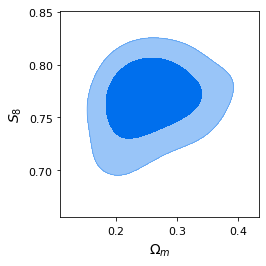

In [7]:
g = plots.get_subplot_plotter(width_inch=3.8)
g.plot_2d(chain_sh, 'Omega_m', 'S_8', filled=True)
g.finish_plot()

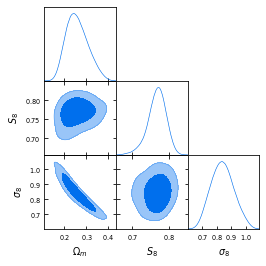

In [8]:
g = plots.get_subplot_plotter(width_inch=3.8)
g.triangle_plot([chain_sh], params=['Omega_m', 'S_8', 'sigma_8'], filled=True)
g.finish_plot()

In [7]:
for pn in chain_sh.getParamNames().list():
    print(chain_sh.getInlineLatex(pn, 2))

\Omega_{b } = 0.049^{+0.019}_{-0.018}
\Omega_{c } = 0.208^{+0.095}_{-0.080}
10^{-9}A_{s } = 3.1^{+1.8}_{-1.8}
n_{s } = 0.961^{+0.095}_{-0.088}
h = 0.70^{+0.17}_{-0.15}
wl_{ia A } = 0.2^{+1.6}_{-1.8}
wl_{ia eta } = 1.8^{+3.3}_{-5.2}
wl_{m 0 } = 0.021^{+0.045}_{-0.043}
wl_{m 1 } = 0.002^{+0.044}_{-0.043}
wl_{m 2 } = 0.021^{+0.041}_{-0.040}
wl_{m 3 } = 0.003^{+0.041}_{-0.041}
wl_{dz 0 } = -0.016^{+0.032}_{-0.030}
wl_{dz 1 } = -0.009^{+0.023}_{-0.023}
wl_{dz 2 } = 0.004^{+0.020}_{-0.021}
wl_{dz 3 } = -0.011^{+0.040}_{-0.040}
\Omega_{m } = 0.257^{+0.10}_{-0.088}
S_{8 } = 0.767^{+0.048}_{-0.052}


In [25]:
lk = chain_sh.getLikeStats()
chi2 = 2*lk.logLike_sample
print('BF chi2 = ',chi2)
print('data_points =', chain_sh_data['ells'].size)
print('PTE = chi2 / data_points =', 1 - stats.chi2.cdf(chi2, chain_sh_data['ells'].size), '%')
print('PTE = chi2 / (data_points - 15) = ', 1 - stats.chi2.cdf(chi2, chain_sh_data['dof']), '%')

BF chi2 =  256.152
data_points = 240
PTE = chi2 / data_points = 0.22615051990069623 %
PTE = chi2 / (data_points - 15) =  0.07538338155878443 %


## With first bpw

In [6]:
path2MP = '/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio'
path2sh = os.path.join(path2MP, 'chains/cl_cross_corr_v2')
chain_sh_all = getdist.loadMCSamples(os.path.join(path2sh, '2020-09-15_2100000_'),
                           settings={'ignore_rows':0.5})
p = chain_sh_all.getParams()        
chain_sh_all.addDerived(p.S_8 / np.sqrt(p.Omega_m/0.3),
                     'sigma_8', label='\sigma_8')
chain_sh_data_all = np.load(os.path.join(path2sh, 'cl_cross_corr_data_info.npz' ))

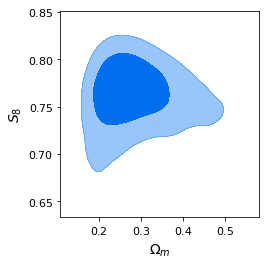

In [12]:
g = plots.get_subplot_plotter(width_inch=3.8)
g.plot_2d(chain_sh_all, 'Omega_m', 'S_8', filled=True)
g.finish_plot()

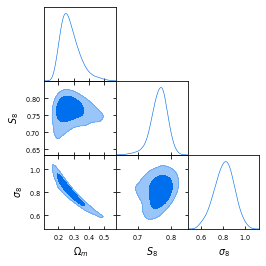

In [13]:
g = plots.get_subplot_plotter(width_inch=3.8)
g.triangle_plot([chain_sh_all], params=['Omega_m', 'S_8', 'sigma_8'], filled=True)
g.finish_plot()

In [14]:
for pn in chain_sh_all.getParamNames().list():
    print(chain_sh_all.getInlineLatex(pn, 2))

\Omega_{b } = 0.049^{+0.019}_{-0.018}
\Omega_{c } = 0.23^{+0.13}_{-0.10}
10^{-9}A_{s } = 2.7^{+2.1}_{-1.8}
n_{s } = 0.970^{+0.091}_{-0.092}
h = 0.69^{+0.17}_{-0.14}
wl_{ia A } = 0.2^{+1.6}_{-1.8}
wl_{ia eta } = 1.8^{+3.2}_{-5.1}
wl_{m 0 } = 0.020^{+0.044}_{-0.044}
wl_{m 1 } = 0.001^{+0.043}_{-0.043}
wl_{m 2 } = 0.022^{+0.041}_{-0.041}
wl_{m 3 } = 0.004^{+0.041}_{-0.041}
wl_{dz 0 } = -0.015^{+0.031}_{-0.029}
wl_{dz 1 } = -0.008^{+0.023}_{-0.023}
wl_{dz 2 } = 0.004^{+0.021}_{-0.021}
wl_{dz 3 } = -0.011^{+0.040}_{-0.041}
\Omega_{m } = 0.28^{+0.14}_{-0.11}
S_{8 } = 0.764^{+0.050}_{-0.052}
\sigma_8 = 0.81^{+0.17}_{-0.19}


In [15]:
lk = chain_sh_all.getLikeStats()
chi2 = 2*lk.logLike_sample
print('BF chi2 = ',chi2)
print('data_points =', chain_sh_data_all['ells'].size)
print('PTE = chi2 / data_points =', 1 - stats.chi2.cdf(chi2, chain_sh_data_all['ells'].size), '%')
print('PTE = chi2 / (data_points - 15) = ', 1 - stats.chi2.cdf(chi2, chain_sh_data_all['dof']), '%')

BF chi2 =  259.46
data_points = 250
PTE = chi2 / data_points = 0.32723188579609863 %
PTE = chi2 / (data_points - 15) =  0.13096796661171028 %


## With first bpw but sigma(l=0, l=0)^2 halved

In [7]:
path2MP = '/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio'
path2sh = os.path.join(path2MP, 'chains/cl_cross_corr_v2-halferror1bin')
chain_sh_all2 = getdist.loadMCSamples(os.path.join(path2sh, '2020-09-21_1000000_'),
                           settings={'ignore_rows':0.5})
p = chain_sh_all2.getParams()        
chain_sh_all2.addDerived(p.S_8 / np.sqrt(p.Omega_m/0.3),
                     'sigma_8', label='\sigma_8')
chain_sh_data_all2 = np.load(os.path.join(path2sh, 'cl_cross_corr_data_info.npz' ))

## With first bpw but sigma(l=0, l=0)^2 * 10

In [2]:
path2MP = '/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio'
path2sh = os.path.join(path2MP, 'chains/cl_cross_corr_v2-10error1bin')
chain_sh_all10 = getdist.loadMCSamples(os.path.join(path2sh, '2020-09-24_1000000_'),
                           settings={'ignore_rows':0.5})
p = chain_sh_all10.getParams()        
chain_sh_all10.addDerived(p.S_8 / np.sqrt(p.Omega_m/0.3),
                     'sigma_8', label='\sigma_8')
chain_sh_data_all10 = np.load(os.path.join(path2sh, 'cl_cross_corr_data_info.npz' ))

/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__1.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__2.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__3.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__4.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__5.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__6.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__7.txt
/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio/chains/cl_cross_corr_v2-10error1bin/2020-09-24_1000000__8.txt
Removed 0.5 as burn in


## Compare them

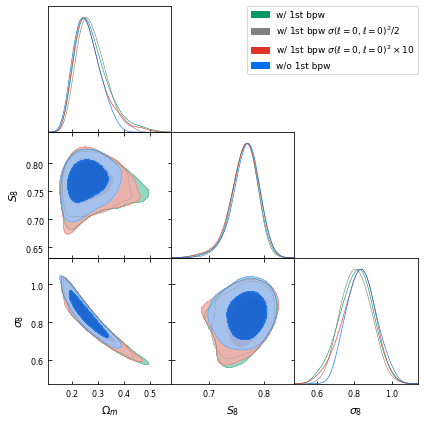

In [10]:
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([chain_sh_all, chain_sh_all2, chain_sh_all10, chain_sh],
                params=['Omega_m', 'S_8', 'sigma_8'],
                legend_labels=['w/ 1st bpw', 'w/ 1st bpw $\sigma(\ell=0, \ell=0)^2/2$',
                               r'w/ 1st bpw $\sigma(\ell=0, \ell=0)^2 \times 10$', 'w/o 1st bpw'],
                filled=True)
g.finish_plot()

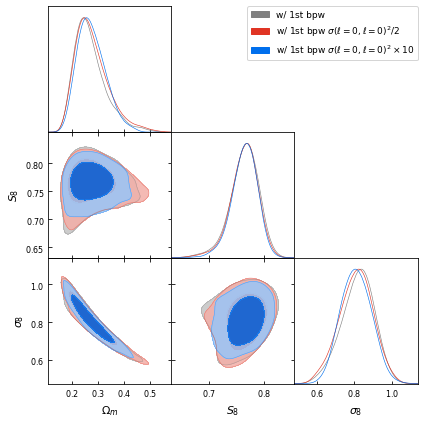

In [13]:
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([chain_sh_all10, chain_sh_all, chain_sh_all2],
                params=['Omega_m', 'S_8', 'sigma_8'],
                legend_labels=['w/ 1st bpw', 'w/ 1st bpw $\sigma(\ell=0, \ell=0)^2/2$',
                               r'w/ 1st bpw $\sigma(\ell=0, \ell=0)^2 \times 10$'],
                filled=True)
g.finish_plot()

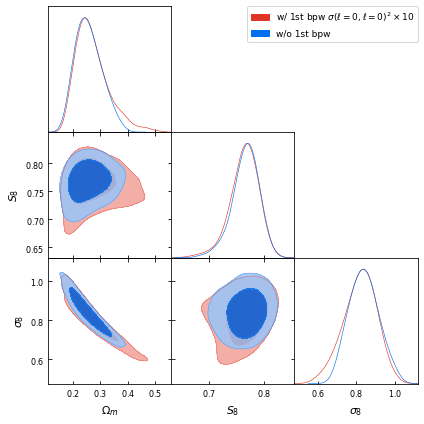

In [11]:
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([chain_sh_all10, chain_sh],
                params=['Omega_m', 'S_8', 'sigma_8'],
                legend_labels=[r'w/ 1st bpw $\sigma(\ell=0, \ell=0)^2 \times 10$', 'w/o 1st bpw'],
                filled=True)
g.finish_plot()

In [9]:
print(chain_sh.getGelmanRubin())
print(chain_sh_all.getGelmanRubin())
print(chain_sh_all2.getGelmanRubin())
print(chain_sh_all10.getGelmanRubin())

0.0778447843009887
0.01981393941315313
0.01473719094663257
0.03227361106272046


In [19]:
path2MP = '/mnt/zfsusers/gravityls_3/codes/montepython_cgg_emilio'
sData = sacc.Sacc.load_fits(os.path.join(path2MP, 'cls_signal_covG_ns4096.fits'))
# Remove all B-mode contributions
sData.remove_selection(data_type='cl_eb')
sData.remove_selection(data_type='cl_be')
sData.remove_selection(data_type='cl_bb')
# And now all ells > 2000
sData.remove_selection(ell__gt=2000)

from scipy.interpolate import interp1d
import pyccl as ccl

def get_cl(cosmo, ccl_tracers, ls, n1, n2):
    ls_nodes = np.unique(np.geomspace(2, ls[-1], 30).astype(int)).astype(float)
    cls_nodes = ccl.angular_cl(cosmo,
                               ccl_tracers[n1],
                               ccl_tracers[n2],
                               ls_nodes)
    cli = interp1d(np.log(ls_nodes), cls_nodes,
                   fill_value=0, bounds_error=False)
    msk = ls >= 2
    cls = np.zeros(len(ls))
    cls[msk] = cli(np.log(ls[msk]))
    return cls

def get_cosmo_and_ccl_tracers(s, pars):
    # Generate cosmology
    cosmo = ccl.Cosmology(**pars)
    # Create CCL Tracers
    ccl_tracers = {n:ccl.WeakLensingTracer(cosmo, (t.z, t.nz))
                  for n, t in s.tracers.items()}
    
    return cosmo, ccl_tracers


###### This is the function to call #######
def get_binned_th(s, pars):
    cosmo, ccl_tracers = get_cosmo_and_ccl_tracers(s, pars)
    d = s.mean
    th = np.zeros_like(d)
    for n1, n2 in s.get_tracer_combinations():
        # Get the indices for this part of the data vector
        ind = s.indices(data_type='cl_ee',
                        tracers=(n1, n2))
        # Get the bandpower window function.
        # w.values contains the values of ell at which
        # it is sampled
        w = s.get_bandpower_windows(ind)
        # Unbinned power spectrum.
        cl_unbinned = get_cl(cosmo, ccl_tracers, w.values, n1, n2)
        # Convolved with window functions.
        cl_binned = np.dot(w.weight.T, cl_unbinned)
        # Assign to theory vector.
        th[ind] = cl_binned
    return th
###########################################
def get_minimum_chi2_params(chain):
    p = chain.getParams()  
    ix = chain.loglikes.argmin()
    params = {'Omega_c': p.Omega_c[ix],
              'Omega_b': p.Omega_b[ix],
              'h': p.h[ix],
              'n_s': p.n_s[ix],
              'sigma8': p.sigma_8[ix],
             'transfer_function': 'boltzmann_class'}
    return params

bf_sh = get_binned_th(sData, get_minimum_chi2_params(chain_sh)) 
bf_sh_all = get_binned_th(sData, get_minimum_chi2_params(chain_sh_all)) 
bf_sh_all2 = get_binned_th(sData, get_minimum_chi2_params(chain_sh_all2)) 

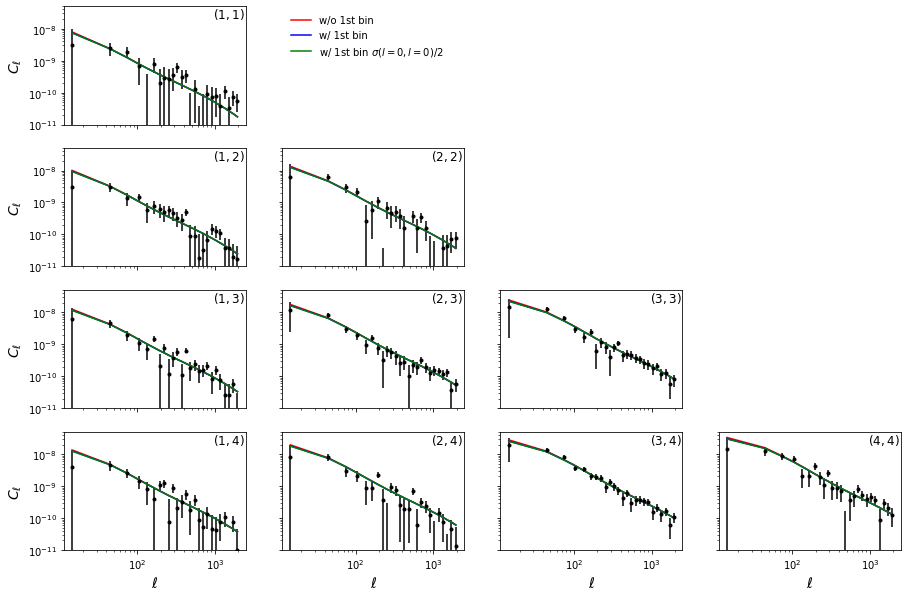

In [26]:
def get_triangle_axes():
    nbins=4
    fig, axes = plt.subplots(nbins, nbins,
                             figsize=(15, 10),
                             sharex=True,
                             sharey=True)
    for b1 in range(nbins) :
        for b2 in range(nbins) :
            if b2<b1 :
                axes[b2,b1].axis('off')
    return axes

axes = get_triangle_axes()
d = sData.mean
cov = sData.covariance.covmat
errors = np.sqrt(np.diag(cov))
for n1, n2 in sData.get_tracer_combinations():
    i1 = int(n1[-1])
    i2 = int(n2[-1])
    ax = axes[i2, i1]
    ind = sData.indices(data_type='cl_ee',
                    tracers=(n1, n2))
    ell = sData.get_tag('ell', data_type='cl_ee',
                    tracers=(n1, n2))

    ax.errorbar(ell, d[ind], yerr=errors[ind], fmt='k.')
    ax.plot(ell, bf_sh[ind], 'r-', label='w/o 1st bin')
    ax.plot(ell, bf_sh_all[ind], 'b-', label='w/ 1st bin')
    ax.plot(ell, bf_sh_all2[ind], 'g-', label='w/ 1st bin $\sigma(l=0, l=0)/2$')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([1E-11, 5E-8])
    ax.text(0.82, 0.9, f'$({i1+1},{i2+1})$',
            transform=ax.transAxes, fontsize=12)
    if i2 == 3:
        ax.set_xlabel(r'$\ell$', fontsize=14)
    if i1 == 0:
        ax.set_ylabel(r'$C_\ell$', fontsize=14)

axes[0, 1].legend(*ax.get_legend_handles_labels(), loc = 'upper left', frameon=False)
plt.show()
plt.close()

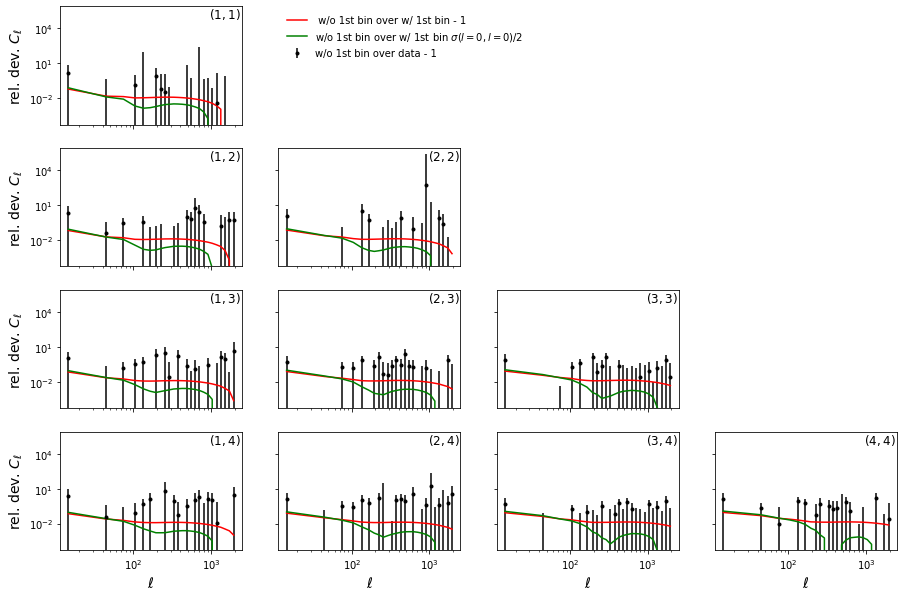

In [31]:
def get_triangle_axes():
    nbins=4
    fig, axes = plt.subplots(nbins, nbins,
                             figsize=(15, 10),
                             sharex=True,
                             sharey=True)
    for b1 in range(nbins) :
        for b2 in range(nbins) :
            if b2<b1 :
                axes[b2,b1].axis('off')
    return axes

axes = get_triangle_axes()
d = sData.mean
cov = sData.covariance.covmat
errors = np.sqrt(np.diag(cov))
for n1, n2 in sData.get_tracer_combinations():
    i1 = int(n1[-1])
    i2 = int(n2[-1])
    ax = axes[i2, i1]
    ind = sData.indices(data_type='cl_ee',
                    tracers=(n1, n2))
    ell = sData.get_tag('ell', data_type='cl_ee',
                    tracers=(n1, n2))
    
    ax.errorbar(ell, bf_sh[ind]/d[ind] - 1, yerr=bf_sh[ind]/d[ind]**2 * errors[ind], fmt='k.', label='w/o 1st bin over data - 1')
    ax.plot(ell, bf_sh[ind]/bf_sh_all[ind] - 1, 'r-', label=' w/o 1st bin over w/ 1st bin - 1')
    ax.plot(ell, bf_sh[ind]/bf_sh_all2[ind] - 1, 'g-', label='w/o 1st bin over w/ 1st bin $\sigma(l=0, l=0)/2$')

    ax.set_xscale('log')
    ax.set_yscale('log')
#     ax.set_ylim([1E-11, 5E-8])
    ax.text(0.82, 0.9, f'$({i1+1},{i2+1})$',
            transform=ax.transAxes, fontsize=12)
    if i2 == 3:
        ax.set_xlabel(r'$\ell$', fontsize=14)
    if i1 == 0:
        ax.set_ylabel(r'rel. dev. $C_\ell$', fontsize=14)

axes[0, 1].legend(*ax.get_legend_handles_labels(), loc = 'upper left', frameon=False)
plt.show()
plt.close()